## import bibliotek

In [1]:

import copy
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import optuna
from optuna.trial import Trial
import torch.optim.swa_utils as swa_utils


## Generowaie funkcji losowej

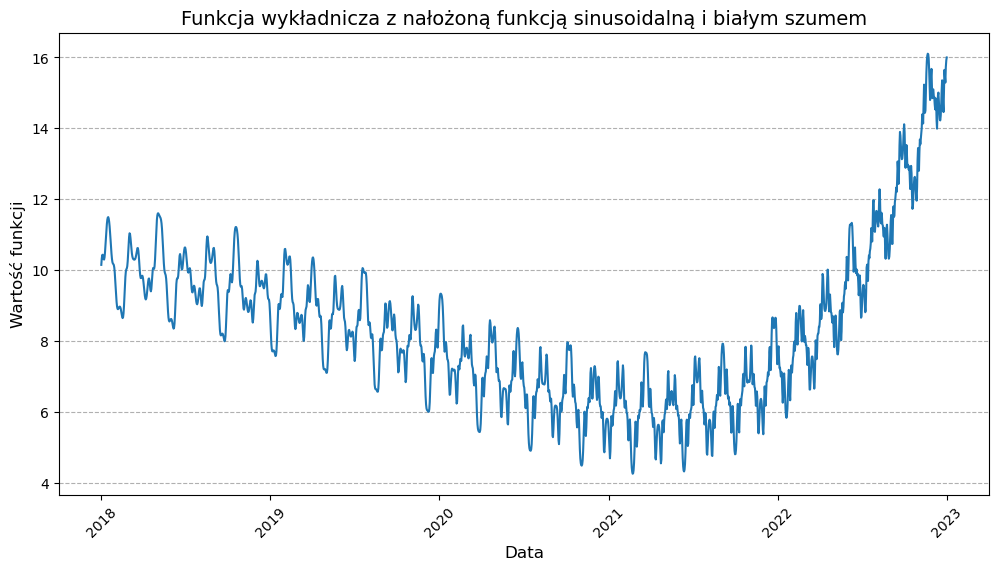

In [2]:
# Twój szereg czasowy (przykładowe dane)
daty = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')
df = pd.DataFrame({'data': daty})
df.set_index('data', inplace=True)

# # Utwórz wektor czasu o długości takiej samej jak df
t = np.linspace(1, 4, len(df))  # Skalujemy czas do przedziału [0, 1]

# # Wygeneruj funkcję wielomianową
# poly_func = 2 * t**3 - 8 * t**2 + 2*t  # Przykładowy wielomian

# # Wygeneruj funkcję sinusoidalną
# sin_func = np.sin(18 * np.pi * t)

# # Wygeneruj biały szum
# noise = np.random.normal(0, 0.0015, len(df))

# # Połącz funkcje i dodaj do DataFrame'u
# df['combined_func'] = poly_func + sin_func + noise

# Trial 151 finished with value: 4.206409399770564 and parameters: 
# {'hidden_dim': 7, 'num_layers': 1, 
# 'lerning_opti_rate': 0.007526508076627938, 
# 'dropout_prob': 0.05088814404525758,
# 'weight_decay': 0.0004296664716162247,
# 'seq_length': 14, 'swa_start': 45}. Best is trial 151 with value: 4.206409399770564.
#######################################################################################


# Parametry funkcji
a = 0.1
b = -0.55
c = 1.1
d = -2
e = 1.5
f = 0.75
g = 4
h = 18
i = 22

# Wygeneruj funkcję wielomianową
poly_func = a * t**5 + b * t**4 + c * t**3 + d * t**2 + e * t +10

# Wygeneruj funkcję sinusoidalną nośną
sin_func = np.sin(i * np.pi * t)

# Wygeneruj funkcję modulującą
modulating_func = f * np.sin(g * (np.pi**2 + sin_func) * t)

# Zastosuj modulację amplitudy
modulated_sin_func = (1 + modulating_func) * sin_func

# Wygeneruj biały szum
noise = np.random.normal(0, 0.001, len(df))

# Połącz funkcje i dodaj do DataFrame'u
df['combined_func'] = poly_func + modulated_sin_func + noise 


# Tworzenie wykresu liniowego
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['combined_func'])

# Ustawienia wykresu
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość funkcji', fontsize=12)
plt.title('Funkcja wykładnicza z nałożoną funkcją sinusoidalną i białym szumem', fontsize=14)
plt.xticks(rotation=45)  # Obrót etykiet osi X dla lepszej czytelności
plt.grid(axis='y', linestyle='--')  # Dodanie siatki na osi Y

# Wyświetlenie wykresu
plt.show()

In [3]:
# from statsmodels.tsa.seasonal import MSTL, DecomposeResult, STL, seasonal_decompose

# total_column = df['combined_func']
# # Dekompozycja MSTL
# mstl = seasonal_decompose(total_column)  # Zakładamy sezonowość roczną (365 dni)
# result = mstl.fit()

# # Przygotowanie danych do wizualizacji w seaborn
# df_results = pd.DataFrame({
#     'Oryginalne dane': total_column,
#     'Trend': result.trend,
#     'Sezonowość (roczna)': result.seasonal,
#     'Reszta': result.resid
# })
# df_results = df_results.stack().reset_index()  # Przekształcenie do formatu "długiego"
# df_results.columns = ['Czas', 'Składowa', 'Wartość']

# df_results.to_csv('MSTL.txt')
# # Wizualizacja z seaborn
# sns.set_theme(style="darkgrid")

# plt.figure(figsize=(14, 10))
# sns.lineplot(x='Czas', y='Wartość', hue='Składowa', data=df_results)
# plt.title('Dekompozycja MSTL')
# plt.xlabel('Czas')
# plt.ylabel('Wartość')
# plt.legend(title='Składowe')
# plt.show()

# # Opcjonalnie: Możesz wyświetlić podsumowanie dekompozycji, ale funkcja summary() nie jest jeszcze dostępna
# # w statsmodels dla obiektów DecomposeResult. Możesz śledzić rozwój tej funkcjonalności.
# # print(result.summary())  

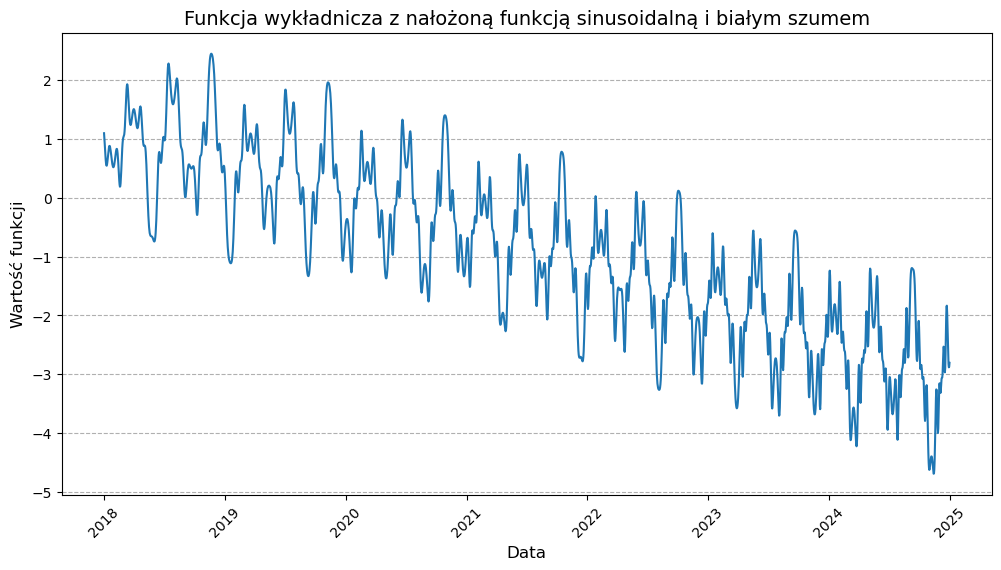

In [4]:
# Twój szereg czasowy (przykładowe dane)
datyy = pd.date_range(start='2018-01-01', end='2024-12-31', freq='D')
dff = pd.DataFrame({'data': datyy})
dff.set_index('data', inplace=True)

# # Utwórz wektor czasu o długości takiej samej jak df
t = np.linspace(1, 2.400328587075575, len(dff))  # Skalujemy czas do przedziału [0, 1]

# Parametry funkcji
a = 0.1
b = -0.5
c = 1
d = -2
e = 0.5
f = 0.75
g = 6
h = 31
i = 31

# Wygeneruj funkcję wielomianową
poly_func = a * t**5 + b * t**4 + c * t**3 + d * t**2 + e * t +2

# Wygeneruj funkcję sinusoidalną nośną
sin_func = np.sin(i * np.pi * t)

# Wygeneruj funkcję modulującą
modulating_func = f * np.sin(g * (np.pi**2 + sin_func) * t)

# Zastosuj modulację amplitudy
modulated_sin_func = (1 + modulating_func) * sin_func

# Wygeneruj biały szum
noise = np.random.normal(0, 0.001, len(dff))

# Połącz funkcje i dodaj do DataFrame'u
dff['combined_func'] = poly_func + modulated_sin_func + noise 


# Tworzenie wykresu liniowego
plt.figure(figsize=(12, 6))
sns.lineplot(x=dff.index, y=dff['combined_func'])

# Ustawienia wykresu
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość funkcji', fontsize=12)
plt.title('Funkcja wykładnicza z nałożoną funkcją sinusoidalną i białym szumem', fontsize=14)
plt.xticks(rotation=45)  # Obrót etykiet osi X dla lepszej czytelności
plt.grid(axis='y', linestyle='--')  # Dodanie siatki na osi Y

# Wyświetlenie wykresu
plt.show()

In [5]:
(dff.shape[0]/df.shape[0])

1.400328587075575

### Generowanie podziału

In [6]:
# Ustawienia podziału
n_splits = 4  # Liczba foldów
fold_size = len(df) // n_splits  # Zaokrąglenie w dół, aby uniknąć przekroczenia zakresu

# Funkcja do generowania indeksów podziału
def custom_time_series_split(df, n_splits, fold_size):
    fold_start = 0  # Zaczynamy od początku
    for i in range(n_splits):
        fold_end = fold_start + fold_size - 1

        train_size = int(fold_size * 0.80)  # 85% na trening
        val_size = int(fold_size * 0.10)  # 10% na walidację
        test_size = fold_size - train_size - val_size  # 5% na test

        train_end = fold_start + train_size - 1
        val_start = train_end + 1
        val_end = val_start + val_size - 1
        test_start = val_end + 1
        test_end = fold_end

        # Indeksy dla zbiorów
        train_index = df.iloc[fold_start: train_end + 1].index
        test_index = df.iloc[test_start: test_end + 1].index

        # Sprawdzenia diagnostyczne
        assert train_end < val_start, f"Fold {i+1}: Zbiór treningowy nachodzi na walidacyjny!"
        assert val_end < test_start, f"Fold {i+1}: Zbiór walidacyjny nachodzi na testowy!"
        assert test_end <= len(df) - 1, f"Fold {i+1}: Zbiór testowy wykracza poza zakres danych!"

        yield train_index, test_index

        fold_start = test_end + 1  # Kolejny fold zaczyna się po końcu poprzedniego testu

# Iteracja po foldach
for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
    # Wyświetlanie indeksów w jednym wierszu
    val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Zaczynamy dzień po treningu
    val_end_date = test_index[0] - pd.DateOffset(days=1)  # Kończymy dzień przed testem

    print(f"\nFold {fold+1}:")
    print(f"  Trening: od {train_index[0].date()} do {train_index[-1].date()}")
    print(f"  Walidacja: od {val_start_date.date()} do {val_end_date.date()}")
    print(f"  Test: od {test_index[0].date()} do {test_index[-1].date()}")



Fold 1:
  Trening: od 2018-01-01 do 2018-12-30
  Walidacja: od 2018-12-31 do 2019-02-13
  Test: od 2019-02-14 do 2019-04-01

Fold 2:
  Trening: od 2019-04-02 do 2020-03-30
  Walidacja: od 2020-03-31 do 2020-05-14
  Test: od 2020-05-15 do 2020-06-30

Fold 3:
  Trening: od 2020-07-01 do 2021-06-29
  Walidacja: od 2021-06-30 do 2021-08-13
  Test: od 2021-08-14 do 2021-09-29

Fold 4:
  Trening: od 2021-09-30 do 2022-09-28
  Walidacja: od 2022-09-29 do 2022-11-12
  Test: od 2022-11-13 do 2022-12-29


# Prosty model

Fold 1, Test Loss: 0.0051


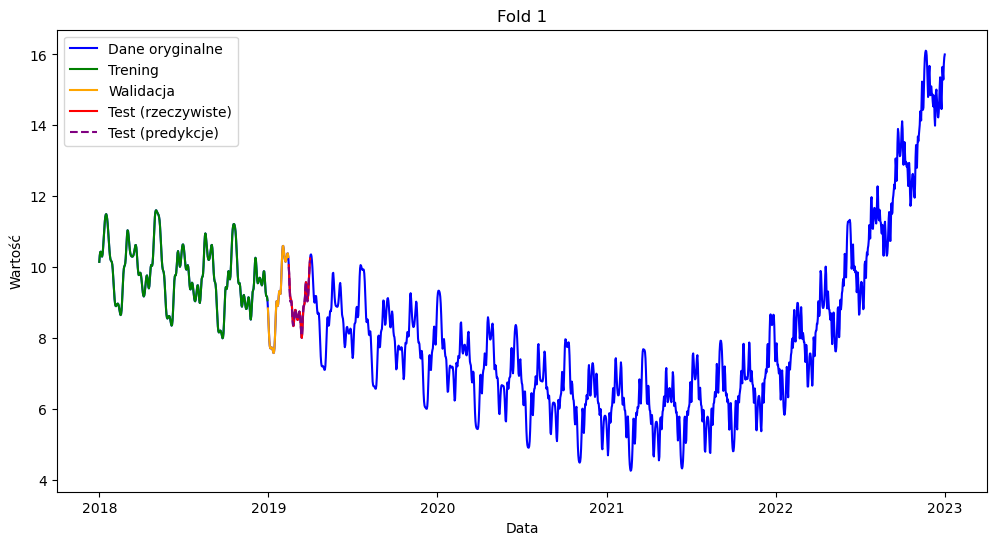

Fold 2, Test Loss: 0.0067


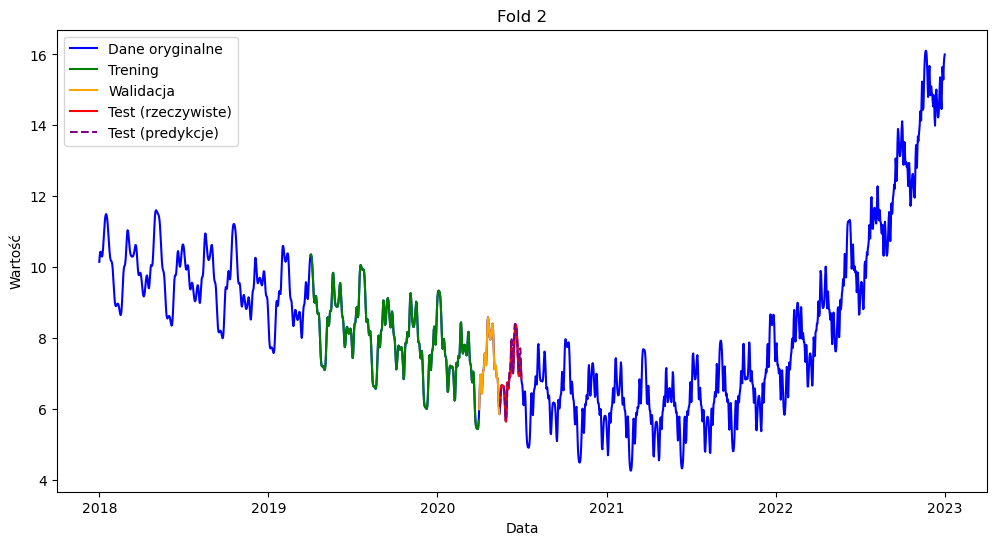

Fold 3, Test Loss: 0.0044


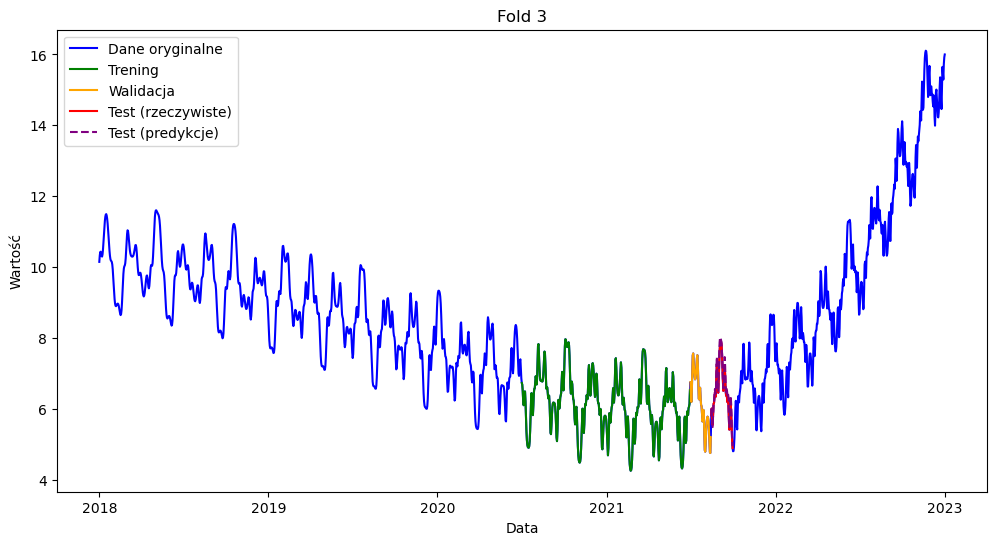

Fold 4, Test Loss: 1.6363


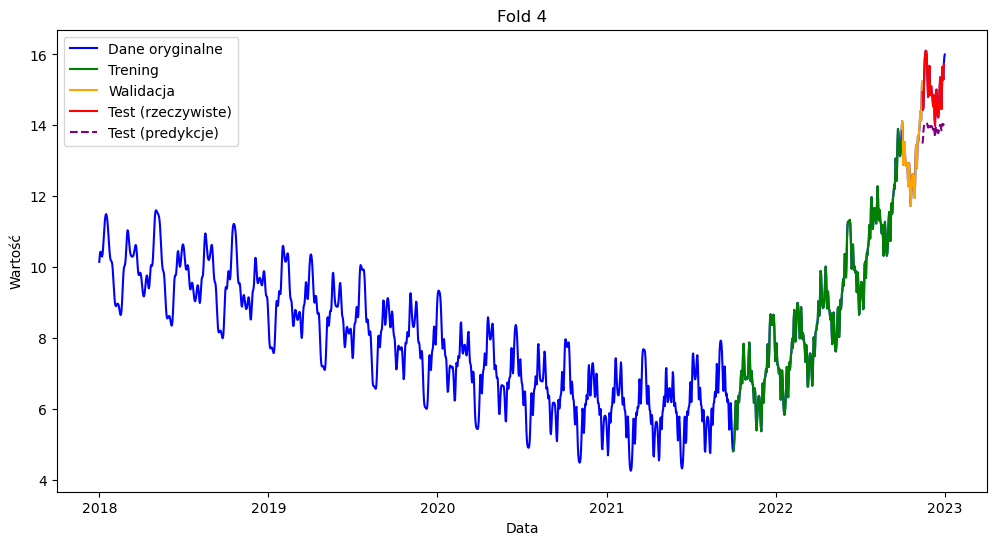

In [7]:
# Definicja modelu LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out)  # Dodajemy Dropout po warstwie LSTM
        out = self.fc(out)
        return out

class ImprovedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob, bidirectional=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)  
        self.gelu = nn.GELU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.ln1 = nn.LayerNorm(hidden_dim * 2) 

    def forward(self, x):
        out, _ = self.lstm(x)
        # Łączenie wyników z obu kierunków
        out = torch.cat((out[:, :, :hidden_dim], out[:, :, hidden_dim:]), dim=-1)
        out = self.ln1(out)  
        out = self.fc1(out)
        out = self.gelu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out
###############################################################################################################################
###############################################################################################################################
##############################################################################################################################
class TimeSeriesDataset(Dataset):
    def __init__(self, df, index, seq_length):
        self.data = torch.tensor(df.loc[index].values).float()
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję

def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=32):
    train_dataset = TimeSeriesDataset(df, train_index, seq_length)
    val_dataset = TimeSeriesDataset(df, val_index, seq_length)
    test_dataset = TimeSeriesDataset(df, test_index, seq_length)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0

    for batch in data_loader:
        optimizer.zero_grad()
        outputs = model(batch)

        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    return train_loss / len(data_loader)

def evaluate(model, data_loader, criterion):
    model.eval()
    eval_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            outputs = model(batch)
            loss = criterion(outputs, batch)
            eval_loss += loss.item()

    return eval_loss / len(data_loader)

# Parametry modelu
# Parametry modelu po optymalizacji hiper paramatrów
input_dim = 1
output_dim = 1  # Przewidywana wartość
num_epochs = 160
# Hiperparametry po optymalizacji
hidden_dim   = 57
num_layers   = 1
lr           = 0.005543902448834151
dropout_prob = 0.2653395103682225
weight_decay = 0.0002195805759849081
seq_length   = 4
swa_start    = 40

# Trial 28 finished with value: 0.7964022443629801 and parameters:
#     {'hidden_dim': 57, 'num_layers': 1, 'lerning_opti_rate': 0.005543902448834151, 'dropout_prob': 0.2653395103682225,
#      'weight_decay': 0.0002195805759849081, 'seq_length': 4, 'swa_start': 40,
#      'patience_LROnPlateau': 14, 'anneal_epoch_SWALR': 17, 
#      'SWALR_lerning_rate': 0.018538140935630158}. Best is trial 28 with value: 0.7964022443629801.

# Tworzenie modelu i optymalizatora
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
#model = ImprovedLSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
swa_model = swa_utils.AveragedModel(model)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

# Funkcja straty i schedulery
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "min", patience=14)
swa_scheduler = swa_utils.SWALR(
    optimizer, anneal_strategy="linear", anneal_epochs=17, swa_lr= 0.018538140935630158
)

total_val_loss = 0.0
total_test_loss = 0.0 


# Iteracja po foldach
for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
    # Wyświetlanie indeksów w jednym wierszu
    val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Zaczynamy dzień po treningu
    val_end_date = test_index[0] - pd.DateOffset(days=1)  # Kończymy dzień przed testem
    val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

    train_loader, val_loader, test_loader = create_data_loaders(df, train_index, val_index, test_index,seq_length=seq_length)

    best_val_loss = float('inf')  # Dla wczesnego zatrzymania
    patience_counter = 0
    # Trening
    for epoch in range(num_epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer)

        # Walidacja
        val_loss = evaluate(model, val_loader, criterion)
        #print(f"Fold {fold+1}, Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # # Wczesne zatrzymanie
        # if val_loss < best_val_loss:
        #     best_val_loss = val_loss
        #     patience_counter = 0
        # else:
        #     patience_counter += 1
        #     if patience_counter >= 12:  # Przerwij po 15 epokach bez poprawy
        #         print(f"Early stopping at epoch {epoch+1}")
        #         break

        if epoch > swa_start:
            swa_model.update_parameters(model)
            swa_scheduler.step()
        else:
            scheduler.step(val_loss)

    # Aktualizacja Batch Normalization i SWA po każdym foldzie
    swa_utils.update_bn(train_loader, swa_model)
    swa_model.update_parameters(model)
    
    # Test (ewaluacja na zbiorze testowym)
    test_loss = evaluate(model, test_loader, criterion)
    print(f"Fold {fold+1}, Test Loss: {test_loss:.4f}")

    # Wizualizacja
    plt.figure(figsize=(12, 6))

    # Oryginalne dane
    plt.plot(df.index, df.values, label="Dane oryginalne", color="blue")

    # Dane treningowe
    plt.plot(train_index, df.loc[train_index], label="Trening", color="green")

    # Dane walidacyjne
    plt.plot(val_index, df.loc[val_index], label="Walidacja", color="orange")

    # Dane testowe i predykcje
    plt.plot(test_index, df.loc[test_index], label="Test (rzeczywiste)", color="red")
    with torch.no_grad():
        test_pred = model(torch.tensor(df.loc[test_index].values).float().unsqueeze(0))
    plt.plot(test_index, test_pred.numpy().flatten(), label="Test (predykcje)", color="purple", linestyle="--")

    plt.xlabel("Data")
    plt.ylabel("Wartość")
    plt.title(f"Fold {fold + 1}")
    plt.legend()
    plt.show()
# Fold 1, Test Loss: 0.0063 | Fold 2, Test Loss: 0.0137| Fold 3, Test Loss: 0.0014| Fold 4, Test Loss: 1.3554            

## Optuna

In [8]:
# class TimeSeriesDataset(Dataset):
#     def __init__(self, df, index, seq_length):
#         self.data = torch.tensor(df.loc[index].values).float()
#         self.seq_length = seq_length

#     def __len__(self):
#         return len(self.data) - self.seq_length

#     def __getitem__(self, idx):
#         return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję


# # Definicja modelu LSTM
# class LSTMModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
#         super().__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
#         self.dropout = nn.Dropout(dropout_prob)
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         out = self.dropout(out)  # Dodajemy Dropout po warstwie LSTM
#         out = self.fc(out)
#         return out

# def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=32):
#     train_dataset = TimeSeriesDataset(df, train_index, seq_length)
#     val_dataset = TimeSeriesDataset(df, val_index, seq_length)
#     test_dataset = TimeSeriesDataset(df, test_index, seq_length)

#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
#     val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#     return train_loader, val_loader, test_loader


# def train_epoch(model, data_loader, criterion, optimizer):
#     model.train()
#     train_loss = 0.0

#     for batch in data_loader:
#         optimizer.zero_grad()
#         outputs = model(batch)

#         loss = criterion(outputs, batch)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()

#     return train_loss / len(data_loader)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     eval_loss = 0.0

#     with torch.no_grad():
#         for batch in data_loader:
#             outputs = model(batch)
#             loss = criterion(outputs, batch)
#             eval_loss += loss.item()

#     return eval_loss / len(data_loader)

# # Parametry modelu
# #seq_length = 10  # Długość sekwencji wejściowej
# input_dim = 1
# output_dim = 1  # Przewidywana wartość
# num_epochs = 160

# def objective(trial: Trial, df, n_splits, fold_size):
#     # Hiperparametry do optymalizacji
#     hidden_dim = trial.suggest_int("hidden_dim", 4, 186)
#     num_layers = trial.suggest_int("num_layers", 1, 3)
#     lr         = trial.suggest_float("lerning_opti", 1e-6, 1e-2)
#     dropout_prob = trial.suggest_float("dropout_prob", 0.0, 0.4)
#     weight_decay = trial.suggest_float("weight_decay", 1e-7, 1e-3)
#     seq_length  =  trial.suggest_int("seq_length", 4, 16)

#     # Tworzenie modelu i optymalizatora
#     model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
#     optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

#     # Funkcja straty i scheduler
#     criterion = nn.MSELoss()
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "max", patience=22)

#     total_val_loss = 0.0  # strata walidacyjna
#     total_test_loss = 0.0  # strata testowa
    
#     # Iteracja po foldach
#     for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
        
#         # Obliczanie indeksów walidacyjnych
#         val_start_date = train_index[-1] + pd.DateOffset(days=1)
#         val_end_date = test_index[0] - pd.DateOffset(days=1)
#         val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

#         # Tworzenie DataLoaderów
#         train_loader, val_loader, test_loader = create_data_loaders(
#             df, train_index, val_index, test_index, seq_length
#         )

#         best_val_loss = float("inf")
#         patience_counter = 0

#         # Trening
#         for epoch in range(num_epochs):
#             train_loss = train_epoch(model, train_loader, criterion, optimizer)
#             val_loss = evaluate(model, val_loader, criterion)
#             test_loss = evaluate(model, test_loader, criterion)

#             # Raportowanie wyniku do Optuny
#             trial.report(val_loss + test_loss, epoch)

#             # Wczesne zatrzymanie przez Optunę
#             # if trial.should_prune():
#             #     raise optuna.exceptions.TrialPruned()

#             # Wczesne zatrzymywanie i zapamiętywanie najlepszego modelu
#             if val_loss < best_val_loss:
#                 best_val_loss = val_loss
#                 patience_counter = 0
#             else:
#                 patience_counter += 1
#                 if patience_counter >= 14:
#                     break
#             total_val_loss += best_val_loss
#             total_test_loss += test_loss
#             scheduler.step(val_loss)

#     avg_val_loss = total_val_loss / n_splits
#     avg_test_loss = total_test_loss / n_splits

#     return avg_val_loss + avg_test_loss
# # Uruchomienie optymalizacji
# study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(n_startup_trials=48), pruner=None) 
# study.optimize(lambda trial: objective(trial, df, n_splits, fold_size), n_trials=30)  

# print("Najlepsze hiperparametry:", study.best_params)
# fig = optuna.visualization.plot_parallel_coordinate(study)
# fig.show()

## Optuna V2

[I 2024-06-11 19:22:23,831] A new study created in memory with name: no-name-3256dc99-8362-4c38-b1eb-34d360b6d563


Early stopping at epoch 104
Early stopping at epoch 98
Early stopping at epoch 95


[I 2024-06-11 19:23:48,142] Trial 0 finished with value: 58.46420781314373 and parameters: {'hidden_dim': 268, 'num_layers': 4, 'lerning_opti_rate': 0.006519081632445007, 'dropout_prob': 0.13167400704702317, 'weight_decay': 0.0008764109871733346, 'seq_length': 7, 'swa_start': 43, 'patience_LROnPlateau': 17, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.031686364087669706}. Best is trial 0 with value: 58.46420781314373.


Early stopping at epoch 49
Early stopping at epoch 59
Early stopping at epoch 81
Early stopping at epoch 150


[I 2024-06-11 19:24:33,729] Trial 1 finished with value: 54.16571992635727 and parameters: {'hidden_dim': 179, 'num_layers': 3, 'lerning_opti_rate': 0.006525131767270812, 'dropout_prob': 0.3476657866602523, 'weight_decay': 0.0001762885909825496, 'seq_length': 7, 'swa_start': 22, 'patience_LROnPlateau': 21, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.01032865797800204}. Best is trial 1 with value: 54.16571992635727.


Early stopping at epoch 49
Early stopping at epoch 84
Early stopping at epoch 81
Early stopping at epoch 73


[I 2024-06-11 19:25:56,295] Trial 2 finished with value: 55.240830183029175 and parameters: {'hidden_dim': 119, 'num_layers': 6, 'lerning_opti_rate': 0.003164259174587949, 'dropout_prob': 0.03563000779642725, 'weight_decay': 0.00047767901785771406, 'seq_length': 13, 'swa_start': 23, 'patience_LROnPlateau': 16, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.0230345320726799}. Best is trial 1 with value: 54.16571992635727.


Early stopping at epoch 50
Early stopping at epoch 100
Early stopping at epoch 84


[I 2024-06-11 19:30:33,162] Trial 3 finished with value: 32.80595326423645 and parameters: {'hidden_dim': 311, 'num_layers': 6, 'lerning_opti_rate': 0.006015179501127961, 'dropout_prob': 0.09327724160499362, 'weight_decay': 0.0006867346004077638, 'seq_length': 13, 'swa_start': 31, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.03713042722730133}. Best is trial 3 with value: 32.80595326423645.


Early stopping at epoch 101
Early stopping at epoch 56
Early stopping at epoch 137
Early stopping at epoch 70


[I 2024-06-11 19:31:19,133] Trial 4 finished with value: 105.95107296481729 and parameters: {'hidden_dim': 229, 'num_layers': 2, 'lerning_opti_rate': 0.0055749905742459825, 'dropout_prob': 0.045658671637886464, 'weight_decay': 0.00017968021572829497, 'seq_length': 11, 'swa_start': 20, 'patience_LROnPlateau': 16, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.011746832347198142}. Best is trial 3 with value: 32.80595326423645.


Early stopping at epoch 90
Early stopping at epoch 50
Early stopping at epoch 108


[I 2024-06-11 19:33:47,903] Trial 5 finished with value: 62.41213035583496 and parameters: {'hidden_dim': 189, 'num_layers': 5, 'lerning_opti_rate': 0.00406704614959462, 'dropout_prob': 0.21877846560602782, 'weight_decay': 0.0005299860417905264, 'seq_length': 16, 'swa_start': 49, 'patience_LROnPlateau': 14, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.048829067988452365}. Best is trial 3 with value: 32.80595326423645.


Early stopping at epoch 49


[I 2024-06-11 19:34:09,464] Trial 6 finished with value: 2.8694747865665704 and parameters: {'hidden_dim': 56, 'num_layers': 1, 'lerning_opti_rate': 0.002063330182811846, 'dropout_prob': 0.11286249659856228, 'weight_decay': 0.0003927940119548965, 'seq_length': 14, 'swa_start': 31, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.010549519054455388}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 79
Early stopping at epoch 91
Early stopping at epoch 77


[I 2024-06-11 19:37:43,147] Trial 7 finished with value: 30.523876428604126 and parameters: {'hidden_dim': 311, 'num_layers': 6, 'lerning_opti_rate': 0.00929594194596359, 'dropout_prob': 0.24167151365450384, 'weight_decay': 0.000667874129524321, 'seq_length': 16, 'swa_start': 21, 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.04924184813224262}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 79
Early stopping at epoch 158
Early stopping at epoch 103


[I 2024-06-11 19:38:52,665] Trial 8 finished with value: 61.876166597008705 and parameters: {'hidden_dim': 269, 'num_layers': 2, 'lerning_opti_rate': 0.0016902008920134748, 'dropout_prob': 0.32130698448375783, 'weight_decay': 0.0007446142823142933, 'seq_length': 13, 'swa_start': 44, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.04222664417180232}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 49
Early stopping at epoch 139
Early stopping at epoch 98
Early stopping at epoch 73


[I 2024-06-11 19:40:01,586] Trial 9 finished with value: 50.6997589468956 and parameters: {'hidden_dim': 167, 'num_layers': 5, 'lerning_opti_rate': 0.0006739879730961051, 'dropout_prob': 0.3299008156770351, 'weight_decay': 7.594676445606677e-05, 'seq_length': 5, 'swa_start': 24, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.040278809171170056}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 79


[I 2024-06-11 19:40:23,067] Trial 10 finished with value: 4.354389914311469 and parameters: {'hidden_dim': 50, 'num_layers': 1, 'lerning_opti_rate': 0.002929073410353456, 'dropout_prob': 0.0937962311720617, 'weight_decay': 0.00012868536529284447, 'seq_length': 15, 'swa_start': 27, 'patience_LROnPlateau': 12, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.030912154630628384}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 144
Early stopping at epoch 132


[I 2024-06-11 19:41:25,730] Trial 11 finished with value: 122.28670448064804 and parameters: {'hidden_dim': 148, 'num_layers': 2, 'lerning_opti_rate': 0.002929039218024276, 'dropout_prob': 0.02975286356474827, 'weight_decay': 8.078288060338971e-05, 'seq_length': 15, 'swa_start': 37, 'patience_LROnPlateau': 17, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.04381275615175803}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 98
Early stopping at epoch 133


[I 2024-06-11 19:41:54,455] Trial 12 finished with value: 131.63903283327818 and parameters: {'hidden_dim': 125, 'num_layers': 2, 'lerning_opti_rate': 0.004935936052883031, 'dropout_prob': 0.10694400594436256, 'weight_decay': 0.00045573063762177087, 'seq_length': 4, 'swa_start': 25, 'patience_LROnPlateau': 21, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.029024539539413148}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 91


[I 2024-06-11 19:42:16,293] Trial 13 finished with value: 3.718684584251605 and parameters: {'hidden_dim': 63, 'num_layers': 1, 'lerning_opti_rate': 0.0012660862968935534, 'dropout_prob': 0.030092348203063522, 'weight_decay': 0.0006354157247818837, 'seq_length': 11, 'swa_start': 50, 'patience_LROnPlateau': 18, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.01736834433038975}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 104
Early stopping at epoch 100
Early stopping at epoch 116


[I 2024-06-11 19:43:44,374] Trial 14 finished with value: 41.50504273176193 and parameters: {'hidden_dim': 123, 'num_layers': 6, 'lerning_opti_rate': 0.003108145028041895, 'dropout_prob': 8.410206575035217e-05, 'weight_decay': 7.388670449530095e-06, 'seq_length': 7, 'swa_start': 42, 'patience_LROnPlateau': 13, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.049619122317956635}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 99
Early stopping at epoch 122
Early stopping at epoch 81
Early stopping at epoch 77


[I 2024-06-11 19:45:12,309] Trial 15 finished with value: 46.88821631669998 and parameters: {'hidden_dim': 209, 'num_layers': 6, 'lerning_opti_rate': 0.008074672905341904, 'dropout_prob': 0.051557694993963336, 'weight_decay': 8.505487357525318e-05, 'seq_length': 6, 'swa_start': 24, 'patience_LROnPlateau': 13, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.02474953439690594}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 49
Early stopping at epoch 70
Early stopping at epoch 114


[I 2024-06-11 19:45:48,546] Trial 16 finished with value: 85.86267933389172 and parameters: {'hidden_dim': 310, 'num_layers': 1, 'lerning_opti_rate': 0.0036005711920315104, 'dropout_prob': 0.27886535076271274, 'weight_decay': 0.0009203467773049196, 'seq_length': 14, 'swa_start': 21, 'patience_LROnPlateau': 15, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.04802190310027325}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 82
Early stopping at epoch 93


[I 2024-06-11 19:46:21,623] Trial 17 finished with value: 53.083005018532276 and parameters: {'hidden_dim': 205, 'num_layers': 2, 'lerning_opti_rate': 0.003987103591736662, 'dropout_prob': 0.1366394627083846, 'weight_decay': 0.0002224409227019361, 'seq_length': 4, 'swa_start': 44, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.03602771829266249}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 49
Early stopping at epoch 57
Early stopping at epoch 81
Early stopping at epoch 68


[I 2024-06-11 19:47:27,575] Trial 18 finished with value: 57.64479485154152 and parameters: {'hidden_dim': 262, 'num_layers': 5, 'lerning_opti_rate': 0.004686327526680185, 'dropout_prob': 0.3229889591038878, 'weight_decay': 5.498218762569133e-06, 'seq_length': 5, 'swa_start': 24, 'patience_LROnPlateau': 21, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.032758948196465236}. Best is trial 6 with value: 2.8694747865665704.


Early stopping at epoch 49
Early stopping at epoch 116
Early stopping at epoch 147


[I 2024-06-11 19:47:36,757] Trial 19 finished with value: 0.6766083429101855 and parameters: {'hidden_dim': 42, 'num_layers': 1, 'lerning_opti_rate': 0.006355876950046497, 'dropout_prob': 3.1743813900564354e-05, 'weight_decay': 0.00041686304176851086, 'seq_length': 7, 'swa_start': 21, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.042539053853998365}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 128


[I 2024-06-11 19:47:54,867] Trial 20 finished with value: 40.91337314993143 and parameters: {'hidden_dim': 22, 'num_layers': 2, 'lerning_opti_rate': 0.0008156906458208707, 'dropout_prob': 0.34312680015570224, 'weight_decay': 0.0006176919065312554, 'seq_length': 10, 'swa_start': 45, 'patience_LROnPlateau': 15, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.008340806447645479}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 125
Early stopping at epoch 89


[I 2024-06-11 19:48:10,028] Trial 21 finished with value: 100.35964181274176 and parameters: {'hidden_dim': 118, 'num_layers': 1, 'lerning_opti_rate': 0.009949567204354958, 'dropout_prob': 0.2839386285492054, 'weight_decay': 0.0006442254539060787, 'seq_length': 5, 'swa_start': 32, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.04551687163490391}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 87
Early stopping at epoch 67
Early stopping at epoch 84
Early stopping at epoch 101


[I 2024-06-11 19:49:44,235] Trial 22 finished with value: 49.121835470199585 and parameters: {'hidden_dim': 272, 'num_layers': 6, 'lerning_opti_rate': 0.004047458558278284, 'dropout_prob': 0.21332603543001494, 'weight_decay': 0.0008850322754647667, 'seq_length': 4, 'swa_start': 24, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.030014826566099675}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 83
Early stopping at epoch 148


[I 2024-06-11 19:50:08,509] Trial 23 finished with value: 10.387665417045355 and parameters: {'hidden_dim': 236, 'num_layers': 1, 'lerning_opti_rate': 0.005924332439302093, 'dropout_prob': 0.19197557895514203, 'weight_decay': 0.00011204586496252194, 'seq_length': 6, 'swa_start': 46, 'patience_LROnPlateau': 14, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.016684106365615743}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 130
Early stopping at epoch 97
Early stopping at epoch 93
Early stopping at epoch 123


[I 2024-06-11 19:52:27,673] Trial 24 finished with value: 65.40304972231388 and parameters: {'hidden_dim': 322, 'num_layers': 4, 'lerning_opti_rate': 0.009355349746494743, 'dropout_prob': 0.21209844678501652, 'weight_decay': 0.0008063682842122981, 'seq_length': 12, 'swa_start': 45, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.007175796496146108}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 49
Early stopping at epoch 54
Early stopping at epoch 70
Early stopping at epoch 73


[I 2024-06-11 19:54:08,046] Trial 25 finished with value: 62.76746300980449 and parameters: {'hidden_dim': 273, 'num_layers': 5, 'lerning_opti_rate': 0.006576964606365508, 'dropout_prob': 0.06745705250543116, 'weight_decay': 0.00042406035500196557, 'seq_length': 12, 'swa_start': 21, 'patience_LROnPlateau': 16, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.005994806071984943}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 49
Early stopping at epoch 85
Early stopping at epoch 77


[I 2024-06-11 19:55:09,753] Trial 26 finished with value: 62.72334507852793 and parameters: {'hidden_dim': 47, 'num_layers': 4, 'lerning_opti_rate': 0.0035903385573347935, 'dropout_prob': 0.1585347477850532, 'weight_decay': 0.0009873312429155435, 'seq_length': 12, 'swa_start': 21, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.035016239628670565}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 88
Early stopping at epoch 90


[I 2024-06-11 19:55:38,457] Trial 27 finished with value: 99.4169285040116 and parameters: {'hidden_dim': 213, 'num_layers': 1, 'lerning_opti_rate': 0.007283419802117128, 'dropout_prob': 0.018972340999580433, 'weight_decay': 0.0005266134180434729, 'seq_length': 11, 'swa_start': 40, 'patience_LROnPlateau': 24, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.04978621216879864}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 97
Early stopping at epoch 56


[I 2024-06-11 19:55:54,824] Trial 28 finished with value: 33.780199497938156 and parameters: {'hidden_dim': 16, 'num_layers': 3, 'lerning_opti_rate': 0.006128232480525248, 'dropout_prob': 0.24518209623602716, 'weight_decay': 0.0005442054755087916, 'seq_length': 16, 'swa_start': 28, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.016142912223419226}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 156
Early stopping at epoch 102
Early stopping at epoch 97


[I 2024-06-11 19:56:51,222] Trial 29 finished with value: 59.89879095344804 and parameters: {'hidden_dim': 239, 'num_layers': 2, 'lerning_opti_rate': 0.002423890674977501, 'dropout_prob': 0.28049391043832356, 'weight_decay': 0.00048655875052261465, 'seq_length': 13, 'swa_start': 47, 'patience_LROnPlateau': 20, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.017110945637077348}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 49
Early stopping at epoch 103
Early stopping at epoch 96
Early stopping at epoch 86


[I 2024-06-11 19:58:09,981] Trial 30 finished with value: 61.401700377464294 and parameters: {'hidden_dim': 246, 'num_layers': 3, 'lerning_opti_rate': 0.0015186737068742424, 'dropout_prob': 0.26771081860877927, 'weight_decay': 3.62719506856913e-05, 'seq_length': 13, 'swa_start': 40, 'patience_LROnPlateau': 17, 'anneal_epoch_SWALR': 23, 'SWALR_lerning_rate': 0.015367692433198382}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 50
Early stopping at epoch 76


[I 2024-06-11 20:00:39,526] Trial 31 finished with value: 56.21914365142584 and parameters: {'hidden_dim': 126, 'num_layers': 6, 'lerning_opti_rate': 0.0002114749767598249, 'dropout_prob': 0.17652159409155224, 'weight_decay': 0.00026258266103440134, 'seq_length': 13, 'swa_start': 23, 'patience_LROnPlateau': 13, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.013465372322405954}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 80


[I 2024-06-11 20:01:26,433] Trial 32 finished with value: 58.937172293663025 and parameters: {'hidden_dim': 102, 'num_layers': 3, 'lerning_opti_rate': 0.0053013954364041485, 'dropout_prob': 0.1668727043724228, 'weight_decay': 0.0009149495877237642, 'seq_length': 6, 'swa_start': 49, 'patience_LROnPlateau': 16, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.032236984845639596}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 50
Early stopping at epoch 85
Early stopping at epoch 84


[I 2024-06-11 20:01:47,166] Trial 33 finished with value: 169.92834249138832 and parameters: {'hidden_dim': 123, 'num_layers': 1, 'lerning_opti_rate': 0.0032585715822183864, 'dropout_prob': 0.185047469089465, 'weight_decay': 0.00017548921963135848, 'seq_length': 13, 'swa_start': 35, 'patience_LROnPlateau': 18, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.04489488898377079}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 101
Early stopping at epoch 94
Early stopping at epoch 101
Early stopping at epoch 94


[I 2024-06-11 20:03:21,398] Trial 34 finished with value: 58.03822851926088 and parameters: {'hidden_dim': 327, 'num_layers': 4, 'lerning_opti_rate': 0.006288195950582076, 'dropout_prob': 0.13830337025457268, 'weight_decay': 0.0009192157286361099, 'seq_length': 6, 'swa_start': 41, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.008906570389495149}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 49
Early stopping at epoch 104
Early stopping at epoch 53
Early stopping at epoch 96


[I 2024-06-11 20:04:02,099] Trial 35 finished with value: 61.31261879764497 and parameters: {'hidden_dim': 62, 'num_layers': 5, 'lerning_opti_rate': 0.00452423920681839, 'dropout_prob': 0.06639166112941763, 'weight_decay': 0.00014146793149237249, 'seq_length': 7, 'swa_start': 43, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.018976086424896097}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 51
Early stopping at epoch 145


[I 2024-06-11 20:04:21,172] Trial 36 finished with value: 1.2486381944036111 and parameters: {'hidden_dim': 133, 'num_layers': 1, 'lerning_opti_rate': 0.0035609366836843854, 'dropout_prob': 0.16358085084184582, 'weight_decay': 0.0007869026839348246, 'seq_length': 4, 'swa_start': 23, 'patience_LROnPlateau': 12, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.004655745194954319}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 82
Early stopping at epoch 94


[I 2024-06-11 20:05:17,069] Trial 37 finished with value: 45.0176245495677 and parameters: {'hidden_dim': 131, 'num_layers': 4, 'lerning_opti_rate': 0.0020703958779229674, 'dropout_prob': 0.17659505041147222, 'weight_decay': 0.0007592191915523641, 'seq_length': 5, 'swa_start': 25, 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.0335365977969067}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 95
Early stopping at epoch 112
Early stopping at epoch 100
Early stopping at epoch 89


[I 2024-06-11 20:07:01,092] Trial 38 finished with value: 74.03320924192667 and parameters: {'hidden_dim': 134, 'num_layers': 4, 'lerning_opti_rate': 0.000721021862490554, 'dropout_prob': 0.036791484694145345, 'weight_decay': 0.0002881327783345187, 'seq_length': 14, 'swa_start': 41, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.02027823886140435}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 143
Early stopping at epoch 52
Early stopping at epoch 100
Early stopping at epoch 148


[I 2024-06-11 20:09:25,259] Trial 39 finished with value: 61.735794097185135 and parameters: {'hidden_dim': 143, 'num_layers': 6, 'lerning_opti_rate': 0.002302797160530855, 'dropout_prob': 0.24143617481050123, 'weight_decay': 0.0008767489227641338, 'seq_length': 16, 'swa_start': 49, 'patience_LROnPlateau': 16, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.03193352579719424}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 50
Early stopping at epoch 89


[I 2024-06-11 20:09:49,762] Trial 40 finished with value: 54.47504385653883 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'lerning_opti_rate': 0.007094131360788146, 'dropout_prob': 0.011555295621794042, 'weight_decay': 0.0003870644879205631, 'seq_length': 13, 'swa_start': 44, 'patience_LROnPlateau': 20, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.03885072478653463}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 99
Early stopping at epoch 84
Early stopping at epoch 68
Early stopping at epoch 79


[I 2024-06-11 20:12:32,042] Trial 41 finished with value: 30.085623674094677 and parameters: {'hidden_dim': 260, 'num_layers': 6, 'lerning_opti_rate': 0.008091361351451347, 'dropout_prob': 0.14486723089756542, 'weight_decay': 0.00017378453368349113, 'seq_length': 14, 'swa_start': 23, 'patience_LROnPlateau': 24, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.047904064410478876}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 85


[I 2024-06-11 20:12:52,976] Trial 42 finished with value: 7.776172579731792 and parameters: {'hidden_dim': 79, 'num_layers': 1, 'lerning_opti_rate': 0.0016021194506131043, 'dropout_prob': 0.09502793440485405, 'weight_decay': 0.0003046537815767564, 'seq_length': 9, 'swa_start': 27, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.0011138602785962701}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:13:03,248] Trial 43 finished with value: 11.057826593518257 and parameters: {'hidden_dim': 37, 'num_layers': 1, 'lerning_opti_rate': 0.0013010189036132282, 'dropout_prob': 0.11292731421553551, 'weight_decay': 0.0003773494485841513, 'seq_length': 9, 'swa_start': 30, 'patience_LROnPlateau': 12, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.003343745013423699}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:13:33,803] Trial 44 finished with value: 5.2808666145429015 and parameters: {'hidden_dim': 82, 'num_layers': 1, 'lerning_o

Early stopping at epoch 87


[I 2024-06-11 20:13:45,201] Trial 45 finished with value: 32.150734186172485 and parameters: {'hidden_dim': 7, 'num_layers': 2, 'lerning_opti_rate': 0.0020243682812299464, 'dropout_prob': 0.07812895529614369, 'weight_decay': 0.00037976282378279454, 'seq_length': 8, 'swa_start': 33, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.027627739251893248}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:14:09,826] Trial 46 finished with value: 6.997740332968533 and parameters: {'hidden_dim': 63, 'num_layers': 1, 'lerning_opti_rate': 0.003008835937700926, 'dropout_prob': 0.04929719830477007, 'weight_decay': 0.0005855346027420341, 'seq_length': 15, 'swa_start': 29, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.010988575408492183}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 83
Early stopping at epoch 76


[I 2024-06-11 20:14:39,444] Trial 47 finished with value: 22.818326741456985 and parameters: {'hidden_dim': 99, 'num_layers': 2, 'lerning_opti_rate': 0.0011398940997551076, 'dropout_prob': 0.08635003064022762, 'weight_decay': 0.0005815064006127069, 'seq_length': 8, 'swa_start': 26, 'patience_LROnPlateau': 12, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.021307722549236692}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:14:50,239] Trial 48 finished with value: 16.791498243808746 and parameters: {'hidden_dim': 40, 'num_layers': 1, 'lerning_opti_rate': 0.0003290365220962668, 'dropout_prob': 0.008258812842932187, 'weight_decay': 0.0006994667200373099, 'seq_length': 11, 'swa_start': 31, 'patience_LROnPlateau': 18, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.004318492948639566}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 156


[I 2024-06-11 20:15:08,511] Trial 49 finished with value: 1.9559529880061746 and parameters: {'hidden_dim': 61, 'num_layers': 1, 'lerning_opti_rate': 0.0026248524167975743, 'dropout_prob': 0.024772283790784517, 'weight_decay': 0.0008199157834538888, 'seq_length': 8, 'swa_start': 35, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.02618631165193331}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 93
Early stopping at epoch 100
Early stopping at epoch 88


[I 2024-06-11 20:15:33,064] Trial 50 finished with value: 91.95831083133817 and parameters: {'hidden_dim': 73, 'num_layers': 2, 'lerning_opti_rate': 0.0026361675918675507, 'dropout_prob': 0.0332693235525073, 'weight_decay': 0.0008130173687433875, 'seq_length': 8, 'swa_start': 37, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.02593660557422367}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 139


[I 2024-06-11 20:15:52,075] Trial 51 finished with value: 1.9319438803941011 and parameters: {'hidden_dim': 51, 'num_layers': 1, 'lerning_opti_rate': 0.0037834096081003415, 'dropout_prob': 0.02383476219466813, 'weight_decay': 0.0008403808313961814, 'seq_length': 10, 'swa_start': 34, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.02221009067167573}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:16:02,097] Trial 52 finished with value: 1.4980929624289274 and parameters: {'hidden_dim': 31, 'num_layers': 1, 'lerning_opti_rate': 0.0036066169723860267, 'dropout_prob': 0.024339872921680807, 'weight_decay': 0.0008252490743361042, 'seq_length': 10, 'swa_start': 35, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.02272414654209186}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:16:11,566] Trial 53 finished with value: 6.8972239112481475 and parameters: {'hidden_dim': 28, 'num_layers': 1, 'lerning_o

Early stopping at epoch 151


[I 2024-06-11 20:16:32,695] Trial 54 finished with value: 2.790448577608913 and parameters: {'hidden_dim': 97, 'num_layers': 1, 'lerning_opti_rate': 0.0043465279331379655, 'dropout_prob': 0.059724539644371626, 'weight_decay': 0.000983873450207513, 'seq_length': 9, 'swa_start': 34, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.0010068596435868923}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:16:56,369] Trial 55 finished with value: 10.199632221279899 and parameters: {'hidden_dim': 96, 'num_layers': 1, 'lerning_opti_rate': 0.004567133579158356, 'dropout_prob': 0.062280588259452443, 'weight_decay': 0.0009877975718128346, 'seq_length': 9, 'swa_start': 34, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.0007686297102745612}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:17:48,540] Trial 56 finished with value: 55.668802578002214 and parameters: {'hidden_dim': 155, 'num_layers': 2, 'lerning_

Early stopping at epoch 49
Early stopping at epoch 90
Early stopping at epoch 85


[I 2024-06-11 20:18:04,456] Trial 57 finished with value: 6.205205152975395 and parameters: {'hidden_dim': 88, 'num_layers': 1, 'lerning_opti_rate': 0.00422123133506442, 'dropout_prob': 0.04367586560045965, 'weight_decay': 0.000773479079783246, 'seq_length': 7, 'swa_start': 38, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.02711194720046818}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 132


[I 2024-06-11 20:18:41,368] Trial 58 finished with value: 53.758561936207116 and parameters: {'hidden_dim': 111, 'num_layers': 2, 'lerning_opti_rate': 0.004929248274562355, 'dropout_prob': 0.024429878974827388, 'weight_decay': 0.0009695261733250933, 'seq_length': 9, 'swa_start': 37, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.02343919775949373}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 50


[I 2024-06-11 20:18:59,842] Trial 59 finished with value: 0.8832298510242254 and parameters: {'hidden_dim': 51, 'num_layers': 1, 'lerning_opti_rate': 0.0033709174278875346, 'dropout_prob': 0.0555489603306801, 'weight_decay': 0.0009493655910720617, 'seq_length': 10, 'swa_start': 36, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.04168121464948109}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 133


[I 2024-06-11 20:19:17,716] Trial 60 finished with value: 1.2232641880400479 and parameters: {'hidden_dim': 52, 'num_layers': 1, 'lerning_opti_rate': 0.003761881378781357, 'dropout_prob': 0.04259611542178778, 'weight_decay': 0.0006855751176039762, 'seq_length': 10, 'swa_start': 38, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.03964237608222294}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:19:27,290] Trial 61 finished with value: 9.761113557964563 and parameters: {'hidden_dim': 29, 'num_layers': 1, 'lerning_opti_rate': 0.0037254496983327363, 'dropout_prob': 0.04325489419197223, 'weight_decay': 0.000845157008963337, 'seq_length': 10, 'swa_start': 39, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.04195578980108}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 92
Early stopping at epoch 129


[I 2024-06-11 20:19:46,778] Trial 62 finished with value: 2.106274134479463 and parameters: {'hidden_dim': 46, 'num_layers': 1, 'lerning_opti_rate': 0.003241396800803417, 'dropout_prob': 0.01803657423401176, 'weight_decay': 0.0007044487924825227, 'seq_length': 11, 'swa_start': 36, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.03894424445705593}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:19:55,078] Trial 63 finished with value: 4.807822003960609 and parameters: {'hidden_dim': 9, 'num_layers': 1, 'lerning_opti_rate': 0.002795362367553229, 'dropout_prob': 0.07605566541648696, 'weight_decay': 0.000782183348656018, 'seq_length': 10, 'swa_start': 36, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.04218234179785009}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 92
Early stopping at epoch 147
Early stopping at epoch 87


[I 2024-06-11 20:20:19,230] Trial 64 finished with value: 148.6767507083714 and parameters: {'hidden_dim': 55, 'num_layers': 2, 'lerning_opti_rate': 0.0033989887757578737, 'dropout_prob': 0.03550957553735164, 'weight_decay': 0.0008501994619948129, 'seq_length': 8, 'swa_start': 38, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.037295817528420684}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 72
Early stopping at epoch 104
Early stopping at epoch 151


[I 2024-06-11 20:20:35,242] Trial 65 finished with value: 9.752167995087802 and parameters: {'hidden_dim': 68, 'num_layers': 1, 'lerning_opti_rate': 0.003754439262308754, 'dropout_prob': 0.002434100743058998, 'weight_decay': 0.0009467875539437329, 'seq_length': 11, 'swa_start': 20, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.04012938420830839}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 117
Early stopping at epoch 134


[I 2024-06-11 20:20:44,271] Trial 66 finished with value: 14.946084826253355 and parameters: {'hidden_dim': 23, 'num_layers': 1, 'lerning_opti_rate': 0.003950428329241834, 'dropout_prob': 0.05578540168343566, 'weight_decay': 0.0008781678267093926, 'seq_length': 10, 'swa_start': 32, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.04569597962144883}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 137


[I 2024-06-11 20:20:53,707] Trial 67 finished with value: 1.9219224930275232 and parameters: {'hidden_dim': 37, 'num_layers': 1, 'lerning_opti_rate': 0.005159432022341074, 'dropout_prob': 0.02774691493358789, 'weight_decay': 0.0006674438889587188, 'seq_length': 8, 'swa_start': 22, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.043748279830643555}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 154
Early stopping at epoch 141
Early stopping at epoch 93


[I 2024-06-11 20:21:36,808] Trial 68 finished with value: 69.92178369313478 and parameters: {'hidden_dim': 184, 'num_layers': 2, 'lerning_opti_rate': 0.005211215775865179, 'dropout_prob': 0.013411631951114127, 'weight_decay': 0.0006675822365387195, 'seq_length': 7, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.04705715830477544}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 78
Early stopping at epoch 90


[I 2024-06-11 20:21:46,291] Trial 69 finished with value: 8.511174351908267 and parameters: {'hidden_dim': 44, 'num_layers': 1, 'lerning_opti_rate': 0.005746989869065435, 'dropout_prob': 0.09903557689720477, 'weight_decay': 0.0007327633340753826, 'seq_length': 12, 'swa_start': 22, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.04368902322287579}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 134


[I 2024-06-11 20:21:55,175] Trial 70 finished with value: 6.752026814385317 and parameters: {'hidden_dim': 34, 'num_layers': 1, 'lerning_opti_rate': 0.004852129161607386, 'dropout_prob': 0.07519112129503495, 'weight_decay': 0.00043004957104217, 'seq_length': 9, 'swa_start': 20, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.035621989714169494}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 125


[I 2024-06-11 20:22:02,666] Trial 71 finished with value: 4.444458990357816 and parameters: {'hidden_dim': 16, 'num_layers': 1, 'lerning_opti_rate': 0.0042374053012463565, 'dropout_prob': 0.0273061460915845, 'weight_decay': 0.0007912514624680035, 'seq_length': 8, 'swa_start': 38, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.03743739485299213}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 144
Early stopping at epoch 88


[I 2024-06-11 20:22:19,604] Trial 72 finished with value: 12.887037954758853 and parameters: {'hidden_dim': 54, 'num_layers': 1, 'lerning_opti_rate': 0.003380559924349673, 'dropout_prob': 0.04136325872667583, 'weight_decay': 0.0008280488681911056, 'seq_length': 10, 'swa_start': 36, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.04342640694485925}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 153


[I 2024-06-11 20:22:32,126] Trial 73 finished with value: 11.749556608265266 and parameters: {'hidden_dim': 54, 'num_layers': 1, 'lerning_opti_rate': 0.00297516074269006, 'dropout_prob': 0.02530629517142204, 'weight_decay': 0.0009142463187994325, 'seq_length': 4, 'swa_start': 34, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.04088143946172225}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 136


[I 2024-06-11 20:22:40,998] Trial 74 finished with value: 2.855105252470821 and parameters: {'hidden_dim': 20, 'num_layers': 1, 'lerning_opti_rate': 0.00661882270879625, 'dropout_prob': 0.05113906243501497, 'weight_decay': 0.0006723830655687109, 'seq_length': 11, 'swa_start': 23, 'patience_LROnPlateau': 14, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.0292315482390822}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 142
Early stopping at epoch 77
Early stopping at epoch 121


[I 2024-06-11 20:22:57,543] Trial 75 finished with value: 2.2979467060649768 and parameters: {'hidden_dim': 171, 'num_layers': 1, 'lerning_opti_rate': 0.0021952996012480986, 'dropout_prob': 0.013467348748180607, 'weight_decay': 0.0009485568499276911, 'seq_length': 5, 'swa_start': 22, 'patience_LROnPlateau': 12, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.02074033684868952}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 103
Early stopping at epoch 87


[I 2024-06-11 20:23:08,450] Trial 76 finished with value: 26.123562678694725 and parameters: {'hidden_dim': 4, 'num_layers': 2, 'lerning_opti_rate': 0.003944752115057973, 'dropout_prob': 0.0005387012046646489, 'weight_decay': 0.0007467091113778334, 'seq_length': 8, 'swa_start': 35, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.03363898890344384}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:23:17,400] Trial 77 finished with value: 1.5607291203923523 and parameters: {'hidden_dim': 33, 'num_layers': 1, 'lerning_opti_rate': 0.006995145361732775, 'dropout_prob': 0.02388471239146563, 'weight_decay': 0.000888153161300081, 'seq_length': 6, 'swa_start': 25, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.019155272482022836}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 159
Early stopping at epoch 108


[I 2024-06-11 20:23:41,742] Trial 78 finished with value: 53.8942314684391 and parameters: {'hidden_dim': 74, 'num_layers': 2, 'lerning_opti_rate': 0.006885858528538918, 'dropout_prob': 0.03505053437201873, 'weight_decay': 0.0006182462619446302, 'seq_length': 6, 'swa_start': 25, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.022030268422678398}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 50
Early stopping at epoch 126


[I 2024-06-11 20:23:49,933] Trial 79 finished with value: 2.606615745462477 and parameters: {'hidden_dim': 29, 'num_layers': 1, 'lerning_opti_rate': 0.007316029801700897, 'dropout_prob': 0.2005475691657608, 'weight_decay': 0.0009011995210589459, 'seq_length': 5, 'swa_start': 26, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.013919670024857455}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:23:59,393] Trial 80 finished with value: 2.7526529715396464 and parameters: {'hidden_dim': 35, 'num_layers': 1, 'lerning_opti_rate': 0.007817956043822129, 'dropout_prob': 0.29690253031831926, 'weight_decay': 0.000939750619154061, 'seq_length': 7, 'swa_start': 24, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.019691155566725183}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 94
Early stopping at epoch 137


[I 2024-06-11 20:24:12,602] Trial 81 finished with value: 6.443750807316974 and parameters: {'hidden_dim': 60, 'num_layers': 1, 'lerning_opti_rate': 0.006346757886972915, 'dropout_prob': 0.026756052364827344, 'weight_decay': 0.0008571277071315183, 'seq_length': 6, 'swa_start': 39, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.04612515534275936}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:24:30,674] Trial 82 finished with value: 1.19360416312702 and parameters: {'hidden_dim': 48, 'num_layers': 1, 'lerning_opti_rate': 0.005231943725611399, 'dropout_prob': 0.01893191851845523, 'weight_decay': 0.0008945530128062942, 'seq_length': 7, 'swa_start': 21, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.01780323909651402}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 138


[I 2024-06-11 20:24:48,773] Trial 83 finished with value: 2.480102547444403 and parameters: {'hidden_dim': 47, 'num_layers': 1, 'lerning_opti_rate': 0.006033498108256718, 'dropout_prob': 0.010930819134229254, 'weight_decay': 0.00034134056744406237, 'seq_length': 7, 'swa_start': 20, 'patience_LROnPlateau': 13, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.01848685187501272}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:24:59,226] Trial 84 finished with value: 1.5103944828733802 and parameters: {'hidden_dim': 40, 'num_layers': 1, 'lerning_opti_rate': 0.00516208424596951, 'dropout_prob': 0.059135202928388905, 'weight_decay': 0.000892134060310387, 'seq_length': 7, 'swa_start': 21, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.015105998640092636}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:25:10,025] Trial 85 finished with value: 3.42040809430182 and parameters: {'hidden_dim': 41, 'num_layers': 1, 'lerning_opti_r

Early stopping at epoch 74


[I 2024-06-11 20:25:52,264] Trial 88 finished with value: 2.0855221208184958 and parameters: {'hidden_dim': 84, 'num_layers': 1, 'lerning_opti_rate': 0.004790184023235817, 'dropout_prob': 0.04469649808382214, 'weight_decay': 0.0009419242645396409, 'seq_length': 7, 'swa_start': 24, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.024237664829022926}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:26:09,096] Trial 89 finished with value: 1.4350830810144544 and parameters: {'hidden_dim': 69, 'num_layers': 1, 'lerning_opti_rate': 0.004523732805604228, 'dropout_prob': 0.12019114702347418, 'weight_decay': 0.0005154063010073264, 'seq_length': 5, 'swa_start': 22, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.012239105726379634}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 133


[I 2024-06-11 20:26:45,805] Trial 90 finished with value: 62.4305015206337 and parameters: {'hidden_dim': 74, 'num_layers': 3, 'lerning_opti_rate': 0.004376206041529836, 'dropout_prob': 0.1496357898416267, 'weight_decay': 0.0005434764599647807, 'seq_length': 5, 'swa_start': 21, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.010216721136127151}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 51


[I 2024-06-11 20:26:56,298] Trial 91 finished with value: 1.5072086076252162 and parameters: {'hidden_dim': 35, 'num_layers': 1, 'lerning_opti_rate': 0.0053701829434117665, 'dropout_prob': 0.11881647685992691, 'weight_decay': 0.00043679934917663675, 'seq_length': 6, 'swa_start': 20, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.018426592226831545}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:27:15,197] Trial 92 finished with value: 1.015221702400595 and parameters: {'hidden_dim': 67, 'num_layers': 1, 'lerning_opti_rate': 0.00537100498079564, 'dropout_prob': 0.12236804786449211, 'weight_decay': 0.00043156599410691356, 'seq_length': 6, 'swa_start': 20, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.018277434624725315}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 156


[I 2024-06-11 20:27:30,414] Trial 93 finished with value: 2.274194369558245 and parameters: {'hidden_dim': 65, 'num_layers': 1, 'lerning_opti_rate': 0.0054414626636287485, 'dropout_prob': 0.10544680639618, 'weight_decay': 0.00042733930353803476, 'seq_length': 4, 'swa_start': 20, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.01596298017276723}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 154
Early stopping at epoch 140


[I 2024-06-11 20:27:48,294] Trial 94 finished with value: 4.66550334636122 and parameters: {'hidden_dim': 90, 'num_layers': 1, 'lerning_opti_rate': 0.005780703745888193, 'dropout_prob': 0.12417241034029501, 'weight_decay': 0.00045519029190436934, 'seq_length': 5, 'swa_start': 20, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.012399910099194295}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 77
Early stopping at epoch 142


[I 2024-06-11 20:28:09,051] Trial 95 finished with value: 20.257997968932614 and parameters: {'hidden_dim': 198, 'num_layers': 1, 'lerning_opti_rate': 0.005051806647225171, 'dropout_prob': 0.13168849269703564, 'weight_decay': 0.00035409996935225783, 'seq_length': 6, 'swa_start': 21, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.01800069009067565}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 155
Early stopping at epoch 127


[I 2024-06-11 20:28:27,091] Trial 96 finished with value: 1.2196822110563517 and parameters: {'hidden_dim': 71, 'num_layers': 1, 'lerning_opti_rate': 0.004503837494281886, 'dropout_prob': 0.12438498409230499, 'weight_decay': 0.0005078189645598655, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.014895286770436033}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 85
Early stopping at epoch 103


[I 2024-06-11 20:28:50,156] Trial 97 finished with value: 55.25441692210734 and parameters: {'hidden_dim': 115, 'num_layers': 2, 'lerning_opti_rate': 0.004629000489030423, 'dropout_prob': 0.15880426598402542, 'weight_decay': 0.0004923838116787757, 'seq_length': 4, 'swa_start': 22, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.011222231347359397}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 50


[I 2024-06-11 20:29:10,308] Trial 98 finished with value: 1.7243556305766106 and parameters: {'hidden_dim': 107, 'num_layers': 1, 'lerning_opti_rate': 0.003485951128427616, 'dropout_prob': 0.12282985366751244, 'weight_decay': 0.0005124399800194075, 'seq_length': 6, 'swa_start': 23, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 24, 'SWALR_lerning_rate': 0.006307816152309902}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 134


[I 2024-06-11 20:29:25,877] Trial 99 finished with value: 1.5823031631298363 and parameters: {'hidden_dim': 69, 'num_layers': 1, 'lerning_opti_rate': 0.0040782572670021305, 'dropout_prob': 0.1486816064294617, 'weight_decay': 0.00041056832612689837, 'seq_length': 5, 'swa_start': 23, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.017527480835976616}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 149
Early stopping at epoch 140


[I 2024-06-11 20:29:39,950] Trial 100 finished with value: 1.7289892444387078 and parameters: {'hidden_dim': 50, 'num_layers': 1, 'lerning_opti_rate': 0.0044230892289970295, 'dropout_prob': 0.10782731595131295, 'weight_decay': 0.0005623577190649083, 'seq_length': 5, 'swa_start': 20, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.01397968026657569}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:29:58,714] Trial 101 finished with value: 0.9409700939431787 and parameters: {'hidden_dim': 78, 'num_layers': 1, 'lerning_opti_rate': 0.004934142687971715, 'dropout_prob': 0.08607500278715832, 'weight_decay': 0.0004549219268173084, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.015143542295566281}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 130
Early stopping at epoch 141


[I 2024-06-11 20:30:16,100] Trial 102 finished with value: 1.1521061230450869 and parameters: {'hidden_dim': 77, 'num_layers': 1, 'lerning_opti_rate': 0.004719931041287191, 'dropout_prob': 0.13775439211159202, 'weight_decay': 0.0004598631317692746, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.010090445015658926}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 153
Early stopping at epoch 147


[I 2024-06-11 20:30:32,460] Trial 103 finished with value: 1.2894936207449064 and parameters: {'hidden_dim': 79, 'num_layers': 1, 'lerning_opti_rate': 0.004101362106606999, 'dropout_prob': 0.13996496480393333, 'weight_decay': 0.00040189702512720594, 'seq_length': 5, 'swa_start': 22, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.009581459817786521}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 147


[I 2024-06-11 20:30:50,448] Trial 104 finished with value: 2.3470536242239177 and parameters: {'hidden_dim': 79, 'num_layers': 1, 'lerning_opti_rate': 0.004761217577377089, 'dropout_prob': 0.13944373339280564, 'weight_decay': 0.0004620339174309881, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.009616323603094635}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 144
Early stopping at epoch 155


[I 2024-06-11 20:31:09,248] Trial 105 finished with value: 0.9741800846531987 and parameters: {'hidden_dim': 91, 'num_layers': 1, 'lerning_opti_rate': 0.004974422779024821, 'dropout_prob': 0.16489533527103767, 'weight_decay': 0.0005099821530791553, 'seq_length': 5, 'swa_start': 22, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 23, 'SWALR_lerning_rate': 0.011987244402324286}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:31:28,485] Trial 106 finished with value: 2.0248769453028217 and parameters: {'hidden_dim': 91, 'num_layers': 1, 'lerning_opti_rate': 0.005687560463069825, 'dropout_prob': 0.1650786546192486, 'weight_decay': 0.00040159822439449905, 'seq_length': 5, 'swa_start': 23, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 23, 'SWALR_lerning_rate': 0.004880936137938301}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 141


[I 2024-06-11 20:31:47,451] Trial 107 finished with value: 1.4541334577370435 and parameters: {'hidden_dim': 107, 'num_layers': 1, 'lerning_opti_rate': 0.0041428475986327335, 'dropout_prob': 0.18422545771019133, 'weight_decay': 0.00036101505371152244, 'seq_length': 5, 'swa_start': 24, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 23, 'SWALR_lerning_rate': 0.006782693084111349}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:32:01,458] Trial 108 finished with value: 1.767036252655089 and parameters: {'hidden_dim': 58, 'num_layers': 1, 'lerning_opti_rate': 0.0038708568018563246, 'dropout_prob': 0.12886353609651352, 'weight_decay': 0.0004806891268567945, 'seq_length': 4, 'swa_start': 26, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.00873046985223852}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:32:16,755] Trial 109 finished with value: 1.4069336906541139 and parameters: {'hidden_dim': 80, 'num_layers': 1, 'lerning

Early stopping at epoch 144


[I 2024-06-11 20:33:16,166] Trial 110 finished with value: 61.05895249918103 and parameters: {'hidden_dim': 73, 'num_layers': 5, 'lerning_opti_rate': 0.006210360677540483, 'dropout_prob': 0.15733549103247374, 'weight_decay': 0.00033070361905945117, 'seq_length': 4, 'swa_start': 21, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.010065659464335523}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 50


[I 2024-06-11 20:33:37,180] Trial 111 finished with value: 1.5876486308407038 and parameters: {'hidden_dim': 82, 'num_layers': 1, 'lerning_opti_rate': 0.0049333408214940365, 'dropout_prob': 0.17118692885854772, 'weight_decay': 0.00045206315313849277, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.007395444498423002}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 121


[I 2024-06-11 20:33:57,286] Trial 112 finished with value: 1.5717123770155013 and parameters: {'hidden_dim': 89, 'num_layers': 1, 'lerning_opti_rate': 0.005024213549716498, 'dropout_prob': 0.19798376635705892, 'weight_decay': 0.000410555076309819, 'seq_length': 6, 'swa_start': 23, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 24, 'SWALR_lerning_rate': 0.012723613048049007}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 147


[I 2024-06-11 20:34:17,812] Trial 113 finished with value: 1.6576062268577516 and parameters: {'hidden_dim': 78, 'num_layers': 1, 'lerning_opti_rate': 0.0059393029838933215, 'dropout_prob': 0.13719661619540643, 'weight_decay': 0.0005861011365130567, 'seq_length': 7, 'swa_start': 24, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.005283696978733187}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:34:38,381] Trial 114 finished with value: 2.1914662807248533 and parameters: {'hidden_dim': 95, 'num_layers': 1, 'lerning_opti_rate': 0.004588600232981651, 'dropout_prob': 0.18178110577443776, 'weight_decay': 0.000385128760748426, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.0028719678809202053}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 156


[I 2024-06-11 20:34:57,109] Trial 115 finished with value: 1.2867018058896065 and parameters: {'hidden_dim': 105, 'num_layers': 1, 'lerning_opti_rate': 0.00539943627823405, 'dropout_prob': 0.1580656372438665, 'weight_decay': 0.0004441232246302435, 'seq_length': 5, 'swa_start': 21, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.011601810464109671}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 152


[I 2024-06-11 20:35:15,308] Trial 116 finished with value: 1.5607570754364133 and parameters: {'hidden_dim': 103, 'num_layers': 1, 'lerning_opti_rate': 0.004266852090682293, 'dropout_prob': 0.15316918859578238, 'weight_decay': 0.0005032086601162619, 'seq_length': 5, 'swa_start': 21, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 23, 'SWALR_lerning_rate': 0.011646739186606199}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 74


[I 2024-06-11 20:35:35,481] Trial 117 finished with value: 2.228412422351539 and parameters: {'hidden_dim': 155, 'num_layers': 1, 'lerning_opti_rate': 0.005426502410116725, 'dropout_prob': 0.1617827705760353, 'weight_decay': 0.00048185051108806106, 'seq_length': 5, 'swa_start': 20, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.01571334124773626}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:36:00,148] Trial 118 finished with value: 59.41888230107725 and parameters: {'hidden_dim': 63, 'num_layers': 2, 'lerning_opti_rate': 0.0031573355805468773, 'dropout_prob': 0.14080144047694, 'weight_decay': 0.000533094691776774, 'seq_length': 4, 'swa_start': 24, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.01357983622302934}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 53
Early stopping at epoch 70


[I 2024-06-11 20:36:19,179] Trial 119 finished with value: 2.113389682257548 and parameters: {'hidden_dim': 136, 'num_layers': 1, 'lerning_opti_rate': 0.00465564567441579, 'dropout_prob': 0.08645645458951971, 'weight_decay': 0.00029516573961464135, 'seq_length': 5, 'swa_start': 21, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.014862882586248027}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 158
Early stopping at epoch 78
Early stopping at epoch 152


[I 2024-06-11 20:36:37,096] Trial 120 finished with value: 2.8296230365522206 and parameters: {'hidden_dim': 117, 'num_layers': 1, 'lerning_opti_rate': 0.004072335810815633, 'dropout_prob': 0.1443141650306269, 'weight_decay': 0.0005612740027588472, 'seq_length': 7, 'swa_start': 25, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 23, 'SWALR_lerning_rate': 0.016379586008946578}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 129
Early stopping at epoch 149


[I 2024-06-11 20:36:55,944] Trial 121 finished with value: 1.2594059822149575 and parameters: {'hidden_dim': 85, 'num_layers': 1, 'lerning_opti_rate': 0.004974557054663421, 'dropout_prob': 0.17372528476730087, 'weight_decay': 0.00043523735346185223, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.007670763710958245}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:37:10,940] Trial 122 finished with value: 2.505369570571929 and parameters: {'hidden_dim': 56, 'num_layers': 1, 'lerning_opti_rate': 0.0053511655375901275, 'dropout_prob': 0.17538505750634698, 'weight_decay': 0.00041008613205142897, 'seq_length': 6, 'swa_start': 21, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.011513533366062175}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 138


[I 2024-06-11 20:37:28,098] Trial 123 finished with value: 2.14052389212884 and parameters: {'hidden_dim': 87, 'num_layers': 1, 'lerning_opti_rate': 0.004390438740010601, 'dropout_prob': 0.13101164081474875, 'weight_decay': 0.00036873320393759814, 'seq_length': 5, 'swa_start': 23, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.009641535855373891}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 90
Early stopping at epoch 147


[I 2024-06-11 20:37:43,537] Trial 124 finished with value: 1.7659038654528558 and parameters: {'hidden_dim': 102, 'num_layers': 1, 'lerning_opti_rate': 0.004789781561592457, 'dropout_prob': 0.19241061355193434, 'weight_decay': 0.0004712091791731337, 'seq_length': 6, 'swa_start': 37, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.010959663602328498}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 72
Early stopping at epoch 78
Early stopping at epoch 146


[I 2024-06-11 20:37:56,373] Trial 125 finished with value: 38.471031699329615 and parameters: {'hidden_dim': 71, 'num_layers': 1, 'lerning_opti_rate': 0.005867375303734488, 'dropout_prob': 0.1525215542139699, 'weight_decay': 0.00031673993774448625, 'seq_length': 7, 'swa_start': 22, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.04105219755415631}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 127


[I 2024-06-11 20:38:09,959] Trial 126 finished with value: 2.424180930480361 and parameters: {'hidden_dim': 49, 'num_layers': 1, 'lerning_opti_rate': 0.005581975081167696, 'dropout_prob': 0.101618440946822, 'weight_decay': 0.00044571368686080584, 'seq_length': 5, 'swa_start': 23, 'patience_LROnPlateau': 13, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.003960725591385099}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 69


[I 2024-06-11 20:38:26,027] Trial 127 finished with value: 13.415022200904787 and parameters: {'hidden_dim': 96, 'num_layers': 1, 'lerning_opti_rate': 0.0033741508082320683, 'dropout_prob': 0.16894678105338898, 'weight_decay': 0.00026654965311091294, 'seq_length': 6, 'swa_start': 20, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.03906325577369892}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:38:55,352] Trial 128 finished with value: 1.5123212770558894 and parameters: {'hidden_dim': 298, 'num_layers': 1, 'lerning_opti_rate': 0.0038474713818900646, 'dropout_prob': 0.1308327013237429, 'weight_decay': 0.00042307487049917113, 'seq_length': 6, 'swa_start': 21, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.005710477519092472}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:39:14,393] Trial 129 finished with value: 2.169513823464513 and parameters: {'hidden_dim': 65, 'num_layers': 1, 'lerning

Early stopping at epoch 142
Early stopping at epoch 156


[I 2024-06-11 20:39:31,822] Trial 130 finished with value: 5.040534360334277 and parameters: {'hidden_dim': 84, 'num_layers': 1, 'lerning_opti_rate': 0.0036465783160048245, 'dropout_prob': 0.17878853811306644, 'weight_decay': 0.0005043242640909631, 'seq_length': 4, 'swa_start': 20, 'patience_LROnPlateau': 12, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.013148085596125193}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 144


[I 2024-06-11 20:39:49,969] Trial 131 finished with value: 1.5875763902440667 and parameters: {'hidden_dim': 79, 'num_layers': 1, 'lerning_opti_rate': 0.004967998989133436, 'dropout_prob': 0.1477142827233881, 'weight_decay': 0.00046691353422255444, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.007776149569295284}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:40:08,330] Trial 132 finished with value: 1.1628291215747595 and parameters: {'hidden_dim': 76, 'num_layers': 1, 'lerning_opti_rate': 0.005217510318682022, 'dropout_prob': 0.168785261570925, 'weight_decay': 0.00045129135851543125, 'seq_length': 6, 'swa_start': 21, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.007543754365621557}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:40:46,407] Trial 133 finished with value: 63.23087756335735 and parameters: {'hidden_dim': 61, 'num_layers': 3, 'lerning_opt

Early stopping at epoch 51
Early stopping at epoch 147
Early stopping at epoch 138


[I 2024-06-11 20:41:02,371] Trial 134 finished with value: 1.5798808464314789 and parameters: {'hidden_dim': 94, 'num_layers': 1, 'lerning_opti_rate': 0.004759578079553357, 'dropout_prob': 0.16036356560729073, 'weight_decay': 0.000427876152830311, 'seq_length': 5, 'swa_start': 23, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.01036715977431176}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 128
Early stopping at epoch 142


[I 2024-06-11 20:41:17,638] Trial 135 finished with value: 1.4498002449981868 and parameters: {'hidden_dim': 74, 'num_layers': 1, 'lerning_opti_rate': 0.004470604307766996, 'dropout_prob': 0.14268814555598253, 'weight_decay': 0.0004914168443751383, 'seq_length': 5, 'swa_start': 21, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.00843239864091622}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 133


[I 2024-06-11 20:41:31,951] Trial 136 finished with value: 1.4724713424220681 and parameters: {'hidden_dim': 53, 'num_layers': 1, 'lerning_opti_rate': 0.005643414594844899, 'dropout_prob': 0.1540645812414292, 'weight_decay': 0.0005216658531201317, 'seq_length': 6, 'swa_start': 24, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.014390327423743915}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 87
Early stopping at epoch 111


[I 2024-06-11 20:41:46,286] Trial 137 finished with value: 118.87023792974651 and parameters: {'hidden_dim': 110, 'num_layers': 1, 'lerning_opti_rate': 0.0052032915911579825, 'dropout_prob': 0.1679072923541714, 'weight_decay': 0.00039796067366277573, 'seq_length': 7, 'swa_start': 39, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 23, 'SWALR_lerning_rate': 0.044529892410206925}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 96


[I 2024-06-11 20:41:55,932] Trial 138 finished with value: 2.3727776096202433 and parameters: {'hidden_dim': 44, 'num_layers': 1, 'lerning_opti_rate': 0.005480460915352399, 'dropout_prob': 0.1624837328810492, 'weight_decay': 0.00045334886607137137, 'seq_length': 4, 'swa_start': 20, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.00586360735069893}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 78


[I 2024-06-11 20:42:11,679] Trial 139 finished with value: 3.0025830529630184 and parameters: {'hidden_dim': 67, 'num_layers': 1, 'lerning_opti_rate': 0.004834213057720564, 'dropout_prob': 0.11419877264938438, 'weight_decay': 0.00034863193727199685, 'seq_length': 7, 'swa_start': 22, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 24, 'SWALR_lerning_rate': 0.043094606433964365}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 82
Early stopping at epoch 139
Early stopping at epoch 123


[I 2024-06-11 20:42:27,018] Trial 140 finished with value: 1.8225329034030437 and parameters: {'hidden_dim': 124, 'num_layers': 1, 'lerning_opti_rate': 0.004240870826899564, 'dropout_prob': 0.17467040831877254, 'weight_decay': 0.0006382113346034102, 'seq_length': 5, 'swa_start': 21, 'patience_LROnPlateau': 14, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.01199149228631867}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 147


[I 2024-06-11 20:42:46,662] Trial 141 finished with value: 1.910831779241562 and parameters: {'hidden_dim': 84, 'num_layers': 1, 'lerning_opti_rate': 0.005043351055143161, 'dropout_prob': 0.16896426660759922, 'weight_decay': 0.0004395643459238545, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.007648413051758056}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 122


[I 2024-06-11 20:43:03,348] Trial 142 finished with value: 2.1453293403610587 and parameters: {'hidden_dim': 80, 'num_layers': 1, 'lerning_opti_rate': 0.008701734863775337, 'dropout_prob': 0.1961532833468339, 'weight_decay': 0.0004437593246894624, 'seq_length': 6, 'swa_start': 22, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.006777761450929408}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 149


[I 2024-06-11 20:43:20,592] Trial 143 finished with value: 1.2723683121148497 and parameters: {'hidden_dim': 76, 'num_layers': 1, 'lerning_opti_rate': 0.004605616431967916, 'dropout_prob': 0.13610777104083233, 'weight_decay': 0.000414575021239348, 'seq_length': 6, 'swa_start': 23, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.008007270556777532}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 154


[I 2024-06-11 20:43:35,794] Trial 144 finished with value: 1.584830338601023 and parameters: {'hidden_dim': 57, 'num_layers': 1, 'lerning_opti_rate': 0.004622317742024138, 'dropout_prob': 0.09484525830562474, 'weight_decay': 0.00041451232896176556, 'seq_length': 6, 'swa_start': 23, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.010705053342843333}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:43:51,869] Trial 145 finished with value: 1.2694889097474515 and parameters: {'hidden_dim': 69, 'num_layers': 1, 'lerning_opti_rate': 0.004052629372267175, 'dropout_prob': 0.12863361335653734, 'weight_decay': 0.00037028440582056343, 'seq_length': 5, 'swa_start': 25, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.012845152811529112}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:44:09,893] Trial 146 finished with value: 1.8522956324741244 and parameters: {'hidden_dim': 65, 'num_layers': 1, 'lerning_

Early stopping at epoch 147


[I 2024-06-11 20:44:28,727] Trial 147 finished with value: 5.315854247659445 and parameters: {'hidden_dim': 90, 'num_layers': 1, 'lerning_opti_rate': 0.006740240425429883, 'dropout_prob': 0.12576837166067897, 'weight_decay': 0.00036555462484126974, 'seq_length': 6, 'swa_start': 40, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.004451616815838557}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:44:44,915] Trial 148 finished with value: 1.3850273163989186 and parameters: {'hidden_dim': 70, 'num_layers': 1, 'lerning_opti_rate': 0.0053513962151411085, 'dropout_prob': 0.06414112369156415, 'weight_decay': 0.0007082695064142006, 'seq_length': 5, 'swa_start': 24, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.017043321187133052}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:44:59,401] Trial 149 finished with value: 1.810560533311218 and parameters: {'hidden_dim': 49, 'num_layers': 1, 'lerning_o

Early stopping at epoch 73
Early stopping at epoch 158
Early stopping at epoch 137


[I 2024-06-11 20:45:21,678] Trial 150 finished with value: 47.59854825469665 and parameters: {'hidden_dim': 140, 'num_layers': 1, 'lerning_opti_rate': 0.004425419770879842, 'dropout_prob': 0.13451542074943945, 'weight_decay': 0.0004960296107053508, 'seq_length': 9, 'swa_start': 25, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.019837769251724858}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:45:38,075] Trial 151 finished with value: 1.670662162359804 and parameters: {'hidden_dim': 74, 'num_layers': 1, 'lerning_opti_rate': 0.004067189528278735, 'dropout_prob': 0.14634186810220318, 'weight_decay': 0.0003988500920332864, 'seq_length': 5, 'swa_start': 21, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 20, 'SWALR_lerning_rate': 0.008884065352216163}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 77
Early stopping at epoch 143


[I 2024-06-11 20:45:51,930] Trial 152 finished with value: 1.6038548676297069 and parameters: {'hidden_dim': 100, 'num_layers': 1, 'lerning_opti_rate': 0.0035560261527028876, 'dropout_prob': 0.1372599817588387, 'weight_decay': 0.0004156379494609364, 'seq_length': 4, 'swa_start': 22, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.011807058563357564}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:46:08,512] Trial 153 finished with value: 1.2150795618072152 and parameters: {'hidden_dim': 77, 'num_layers': 1, 'lerning_opti_rate': 0.003737751553006612, 'dropout_prob': 0.1559243288561408, 'weight_decay': 0.0003797760930347024, 'seq_length': 5, 'swa_start': 36, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.014008863561296023}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 150


[I 2024-06-11 20:46:23,873] Trial 154 finished with value: 1.4610502910800278 and parameters: {'hidden_dim': 61, 'num_layers': 1, 'lerning_opti_rate': 0.003289524872778689, 'dropout_prob': 0.1487679815230148, 'weight_decay': 0.00043147705689484484, 'seq_length': 5, 'swa_start': 36, 'patience_LROnPlateau': 15, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.013859041836778196}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 99


[I 2024-06-11 20:46:41,450] Trial 155 finished with value: 3.393455025739968 and parameters: {'hidden_dim': 86, 'num_layers': 1, 'lerning_opti_rate': 0.0038016096687092348, 'dropout_prob': 0.15605889534429518, 'weight_decay': 0.00034110305751271474, 'seq_length': 6, 'swa_start': 37, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.04185660234585292}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:47:04,805] Trial 156 finished with value: 0.9744221200235188 and parameters: {'hidden_dim': 70, 'num_layers': 1, 'lerning_opti_rate': 0.002748567716324872, 'dropout_prob': 0.01639356176993224, 'weight_decay': 0.00037204305765746606, 'seq_length': 11, 'swa_start': 36, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 23, 'SWALR_lerning_rate': 0.014314180452123315}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:47:16,952] Trial 157 finished with value: 1.1433048835024238 and parameters: {'hidden_dim': 42, 'num_layers': 1, 'lerning

Early stopping at epoch 156


[I 2024-06-11 20:49:37,513] Trial 165 finished with value: 1.7283202928956598 and parameters: {'hidden_dim': 57, 'num_layers': 1, 'lerning_opti_rate': 0.0024741572917999512, 'dropout_prob': 0.008679452839089477, 'weight_decay': 0.00037103285432855065, 'seq_length': 10, 'swa_start': 35, 'patience_LROnPlateau': 10, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.015685448482445585}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:49:59,038] Trial 166 finished with value: 0.7693924733903259 and parameters: {'hidden_dim': 62, 'num_layers': 1, 'lerning_opti_rate': 0.00352785910364118, 'dropout_prob': 0.020747650703863696, 'weight_decay': 0.0003520924987460606, 'seq_length': 11, 'swa_start': 39, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.013972550473855606}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:50:18,909] Trial 167 finished with value: 4.122373833786696 and parameters: {'hidden_dim': 50, 'num_layers': 1, 'lern

Early stopping at epoch 158


[I 2024-06-11 20:53:56,311] Trial 178 finished with value: 4.240172036224976 and parameters: {'hidden_dim': 54, 'num_layers': 1, 'lerning_opti_rate': 0.003719383153077209, 'dropout_prob': 0.013670335261059952, 'weight_decay': 0.0007651465842907935, 'seq_length': 10, 'swa_start': 41, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.016602511991055804}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:54:17,893] Trial 179 finished with value: 12.405668963678181 and parameters: {'hidden_dim': 75, 'num_layers': 1, 'lerning_opti_rate': 0.003897964059541159, 'dropout_prob': 0.03685452863656464, 'weight_decay': 0.0008019769637657667, 'seq_length': 11, 'swa_start': 41, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.015218122494892667}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 160


[I 2024-06-11 20:54:37,407] Trial 180 finished with value: 1.02587406989187 and parameters: {'hidden_dim': 61, 'num_layers': 1, 'lerning_opti_rate': 0.0034511623729169346, 'dropout_prob': 0.020149582225964722, 'weight_decay': 0.0009145933149987622, 'seq_length': 10, 'swa_start': 40, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.0121255696482542}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:54:56,922] Trial 181 finished with value: 2.0545415016822517 and parameters: {'hidden_dim': 61, 'num_layers': 1, 'lerning_opti_rate': 0.0031500818492330553, 'dropout_prob': 0.0026825388625223556, 'weight_decay': 0.0009310760344917873, 'seq_length': 10, 'swa_start': 40, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.012762970583809331}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:55:17,936] Trial 182 finished with value: 0.8858001008629799 and parameters: {'hidden_dim': 68, 'num_layers': 1, 'lerning_

Early stopping at epoch 108


[I 2024-06-11 20:56:08,213] Trial 184 finished with value: 16.864163518723217 and parameters: {'hidden_dim': 223, 'num_layers': 1, 'lerning_opti_rate': 0.0035205144641899775, 'dropout_prob': 0.01858320912508967, 'weight_decay': 0.0009049863091594834, 'seq_length': 10, 'swa_start': 42, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.014394588147855979}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:56:27,957] Trial 185 finished with value: 1.5924269354436547 and parameters: {'hidden_dim': 68, 'num_layers': 1, 'lerning_opti_rate': 0.003281690915184147, 'dropout_prob': 0.011535783306367476, 'weight_decay': 0.0009269603960600913, 'seq_length': 9, 'swa_start': 43, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.012225449912014215}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 159


[I 2024-06-11 20:56:48,895] Trial 186 finished with value: 0.7869780294131488 and parameters: {'hidden_dim': 79, 'num_layers': 1, 'lerning_opti_rate': 0.003326667045402196, 'dropout_prob': 0.030463320824991955, 'weight_decay': 0.0009603521129941832, 'seq_length': 10, 'swa_start': 41, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.013806869239754991}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:57:09,846] Trial 187 finished with value: 4.152112746145576 and parameters: {'hidden_dim': 79, 'num_layers': 1, 'lerning_opti_rate': 0.0030926817114863645, 'dropout_prob': 0.03152406856803162, 'weight_decay': 0.0009715837312443705, 'seq_length': 10, 'swa_start': 44, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.013811623685138543}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:57:30,055] Trial 188 finished with value: 2.3998497570864856 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'lerning_

Early stopping at epoch 154


[I 2024-06-11 20:58:07,094] Trial 190 finished with value: 1.157571374438703 and parameters: {'hidden_dim': 59, 'num_layers': 1, 'lerning_opti_rate': 0.0033646310012164496, 'dropout_prob': 0.021106440605049015, 'weight_decay': 0.000875691775506524, 'seq_length': 9, 'swa_start': 42, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.012587760900848625}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:58:24,529] Trial 191 finished with value: 2.735497346613556 and parameters: {'hidden_dim': 59, 'num_layers': 1, 'lerning_opti_rate': 0.003414600251033244, 'dropout_prob': 0.020787424038938438, 'weight_decay': 0.0008698334754396339, 'seq_length': 9, 'swa_start': 43, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.012506105860900715}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 20:58:43,865] Trial 192 finished with value: 2.888735016458668 and parameters: {'hidden_dim': 73, 'num_layers': 1, 'lerning_opti

Early stopping at epoch 52


[I 2024-06-11 21:01:09,078] Trial 198 finished with value: 5.944350351870526 and parameters: {'hidden_dim': 91, 'num_layers': 1, 'lerning_opti_rate': 0.003685172293721056, 'dropout_prob': 0.006992836293986903, 'weight_decay': 0.0009347111825172669, 'seq_length': 11, 'swa_start': 43, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.012178426112754232}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:01:29,919] Trial 199 finished with value: 19.32020273245871 and parameters: {'hidden_dim': 66, 'num_layers': 1, 'lerning_opti_rate': 0.0030383230526762786, 'dropout_prob': 0.030833153215585003, 'weight_decay': 0.0008750516521574882, 'seq_length': 10, 'swa_start': 41, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.03079802655880936}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 112


[I 2024-06-11 21:02:12,438] Trial 200 finished with value: 56.86952751129866 and parameters: {'hidden_dim': 73, 'num_layers': 3, 'lerning_opti_rate': 0.0035117860345089216, 'dropout_prob': 0.05473294686015003, 'weight_decay': 0.0009543670651460602, 'seq_length': 10, 'swa_start': 43, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.014114856937921909}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 51
Early stopping at epoch 91


[I 2024-06-11 21:02:33,742] Trial 201 finished with value: 12.66660089744255 and parameters: {'hidden_dim': 82, 'num_layers': 1, 'lerning_opti_rate': 0.003762059607642317, 'dropout_prob': 0.00868574612156503, 'weight_decay': 0.0009176094983700506, 'seq_length': 11, 'swa_start': 41, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.014018141456200532}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:02:53,399] Trial 202 finished with value: 8.677645260700956 and parameters: {'hidden_dim': 77, 'num_layers': 1, 'lerning_opti_rate': 0.0037769615628246945, 'dropout_prob': 0.024570001335179052, 'weight_decay': 0.0008970382373821299, 'seq_length': 9, 'swa_start': 39, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.012942800075390223}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:03:12,195] Trial 203 finished with value: 2.161788589437492 and parameters: {'hidden_dim': 58, 'num_layers': 1, 'lerning_opt

Early stopping at epoch 124


[I 2024-06-11 21:03:55,209] Trial 205 finished with value: 7.778595886658877 and parameters: {'hidden_dim': 86, 'num_layers': 1, 'lerning_opti_rate': 0.003946521272492354, 'dropout_prob': 0.02776872760469611, 'weight_decay': 0.00038225812492956773, 'seq_length': 10, 'swa_start': 42, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.017373493988604972}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 156


[I 2024-06-11 21:04:13,382] Trial 206 finished with value: 1.2885830232407898 and parameters: {'hidden_dim': 48, 'num_layers': 1, 'lerning_opti_rate': 0.004194341558186414, 'dropout_prob': 0.007132422590294463, 'weight_decay': 0.0008766273532052973, 'seq_length': 8, 'swa_start': 41, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.011034721125368218}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:04:35,840] Trial 207 finished with value: 4.885769357671961 and parameters: {'hidden_dim': 68, 'num_layers': 1, 'lerning_opti_rate': 0.0034123259371683485, 'dropout_prob': 0.047648558894828094, 'weight_decay': 0.0008274626154234346, 'seq_length': 12, 'swa_start': 40, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.013489018638294058}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:04:56,244] Trial 208 finished with value: 4.2910263816593215 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'lerning_

Early stopping at epoch 151


[I 2024-06-11 21:11:09,360] Trial 226 finished with value: 1.0046639759093523 and parameters: {'hidden_dim': 74, 'num_layers': 1, 'lerning_opti_rate': 0.0032437089579870904, 'dropout_prob': 0.048589786077971014, 'weight_decay': 0.000953925744913083, 'seq_length': 10, 'swa_start': 44, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.01252442524975391}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:11:31,798] Trial 227 finished with value: 0.952031840221025 and parameters: {'hidden_dim': 71, 'num_layers': 1, 'lerning_opti_rate': 0.0032259937436959316, 'dropout_prob': 0.06806410572887775, 'weight_decay': 0.0009553369734359808, 'seq_length': 10, 'swa_start': 45, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.011942213770566376}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:11:56,241] Trial 228 finished with value: 1.0300107360817492 and parameters: {'hidden_dim': 84, 'num_layers': 1, 'lerning_o

Early stopping at epoch 136


[I 2024-06-11 21:13:09,472] Trial 231 finished with value: 0.7310333685018122 and parameters: {'hidden_dim': 84, 'num_layers': 1, 'lerning_opti_rate': 0.0028864649084065636, 'dropout_prob': 0.060749158808797554, 'weight_decay': 0.0009778700781855867, 'seq_length': 10, 'swa_start': 45, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.011189681057787018}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:13:33,431] Trial 232 finished with value: 0.8967653411673382 and parameters: {'hidden_dim': 81, 'num_layers': 1, 'lerning_opti_rate': 0.002634615355039375, 'dropout_prob': 0.06869168822651017, 'weight_decay': 0.000967076752771304, 'seq_length': 10, 'swa_start': 46, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.01211725389984251}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 96


[I 2024-06-11 21:13:55,107] Trial 233 finished with value: 2.915655046934262 and parameters: {'hidden_dim': 83, 'num_layers': 1, 'lerning_opti_rate': 0.002632472128090335, 'dropout_prob': 0.059661734040461954, 'weight_decay': 0.0009690918478616952, 'seq_length': 10, 'swa_start': 46, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.011823816750298002}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:14:16,811] Trial 234 finished with value: 2.956346589839086 and parameters: {'hidden_dim': 78, 'num_layers': 1, 'lerning_opti_rate': 0.00234497689723202, 'dropout_prob': 0.07399481321683375, 'weight_decay': 0.0009598079693220077, 'seq_length': 10, 'swa_start': 47, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.012915016545100369}. Best is trial 19 with value: 0.6766083429101855.


Early stopping at epoch 155


[I 2024-06-11 21:14:41,228] Trial 235 finished with value: 0.7007715915096924 and parameters: {'hidden_dim': 93, 'num_layers': 1, 'lerning_opti_rate': 0.0026757837260207844, 'dropout_prob': 0.0637867766310634, 'weight_decay': 0.0009999315956444744, 'seq_length': 10, 'swa_start': 47, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.010777606539083285}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:15:06,259] Trial 236 finished with value: 1.0492916719522327 and parameters: {'hidden_dim': 90, 'num_layers': 1, 'lerning_opti_rate': 0.0024849731096269322, 'dropout_prob': 0.08064118840007824, 'weight_decay': 0.0009825723612142592, 'seq_length': 10, 'swa_start': 47, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.01119212950231191}. Best is trial 19 with value: 0.6766083429101855.
[I 2024-06-11 21:15:29,424] Trial 237 finished with value: 3.3997840121155605 and parameters: {'hidden_dim': 94, 'num_layers': 1, 'lerning_o

Early stopping at epoch 96


[I 2024-06-11 21:16:13,568] Trial 239 finished with value: 1.5110117979347706 and parameters: {'hidden_dim': 96, 'num_layers': 1, 'lerning_opti_rate': 0.0029093278368192803, 'dropout_prob': 0.057439452262189335, 'weight_decay': 0.0009766512066268801, 'seq_length': 10, 'swa_start': 45, 'patience_LROnPlateau': 17, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.012697471914160883}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:16:35,740] Trial 240 finished with value: 4.301893419469707 and parameters: {'hidden_dim': 100, 'num_layers': 1, 'lerning_opti_rate': 0.0032851217303863554, 'dropout_prob': 0.06794716265769195, 'weight_decay': 0.0009691151977013354, 'seq_length': 10, 'swa_start': 45, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.01146989588924946}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:16:59,583] Trial 241 finished with value: 3.5177851371699944 and parameters: {'hidden_dim': 84, 'num_layers': 1, 'ler

Early stopping at epoch 101
Early stopping at epoch 107


[I 2024-06-11 21:20:47,820] Trial 249 finished with value: 58.58540762215853 and parameters: {'hidden_dim': 112, 'num_layers': 5, 'lerning_opti_rate': 0.0020574072014581442, 'dropout_prob': 0.0779955008527915, 'weight_decay': 0.0009208876423410235, 'seq_length': 9, 'swa_start': 46, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.011601596524030894}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 51


[I 2024-06-11 21:21:08,767] Trial 250 finished with value: 1.0156112771946937 and parameters: {'hidden_dim': 99, 'num_layers': 1, 'lerning_opti_rate': 0.002167237334932727, 'dropout_prob': 0.07491780728182909, 'weight_decay': 0.0009299976128398426, 'seq_length': 9, 'swa_start': 45, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.008977855484970087}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:21:31,005] Trial 251 finished with value: 0.8261566009023227 and parameters: {'hidden_dim': 104, 'num_layers': 1, 'lerning_opti_rate': 0.0018586271243438881, 'dropout_prob': 0.062305492573763666, 'weight_decay': 0.0009738351079824039, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.010654291400113515}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:21:53,108] Trial 252 finished with value: 2.4699373594485223 and parameters: {'hidden_dim': 104, 'num_layers': 1, 'ler

Early stopping at epoch 98
Early stopping at epoch 101


[I 2024-06-11 21:22:34,584] Trial 254 finished with value: 2.4034348647110164 and parameters: {'hidden_dim': 119, 'num_layers': 1, 'lerning_opti_rate': 0.0024133651636716576, 'dropout_prob': 0.09034629641184282, 'weight_decay': 0.0009052321375656825, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.013407474778540502}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 99


[I 2024-06-11 21:22:52,819] Trial 255 finished with value: 103.34804408554919 and parameters: {'hidden_dim': 105, 'num_layers': 1, 'lerning_opti_rate': 0.0022811064545279563, 'dropout_prob': 0.05706343982403714, 'weight_decay': 0.0009323136913242496, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.04246182965534892}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 102


[I 2024-06-11 21:23:15,071] Trial 256 finished with value: 3.721527294255793 and parameters: {'hidden_dim': 96, 'num_layers': 1, 'lerning_opti_rate': 0.0018053826180287893, 'dropout_prob': 0.07475681779583664, 'weight_decay': 0.0009789926101938147, 'seq_length': 9, 'swa_start': 47, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.009846621138200081}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:23:38,551] Trial 257 finished with value: 3.218891804572195 and parameters: {'hidden_dim': 112, 'num_layers': 1, 'lerning_opti_rate': 0.00221811586891611, 'dropout_prob': 0.06251269884159721, 'weight_decay': 0.0009498347775051063, 'seq_length': 10, 'swa_start': 46, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.012227737978157098}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:24:00,662] Trial 258 finished with value: 2.985610048926901 and parameters: {'hidden_dim': 86, 'num_layers': 1, 'lerning_

Early stopping at epoch 159


[I 2024-06-11 21:24:24,193] Trial 259 finished with value: 2.7408149265684187 and parameters: {'hidden_dim': 93, 'num_layers': 1, 'lerning_opti_rate': 0.002007678425174971, 'dropout_prob': 0.06474128344410754, 'weight_decay': 0.000935783248537407, 'seq_length': 10, 'swa_start': 44, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.013090702066369798}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:24:46,598] Trial 260 finished with value: 0.8203825238160789 and parameters: {'hidden_dim': 89, 'num_layers': 1, 'lerning_opti_rate': 0.0025375754181802814, 'dropout_prob': 0.07218173064834221, 'weight_decay': 0.0008995986984551615, 'seq_length': 9, 'swa_start': 45, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.010979347367768733}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:25:08,971] Trial 261 finished with value: 1.0854777295608073 and parameters: {'hidden_dim': 108, 'num_layers': 1, 'lernin

Early stopping at epoch 100
Early stopping at epoch 147


[I 2024-06-11 21:27:36,397] Trial 268 finished with value: 21.097711531911045 and parameters: {'hidden_dim': 89, 'num_layers': 1, 'lerning_opti_rate': 0.0028964311637912597, 'dropout_prob': 0.052271526002252613, 'weight_decay': 0.0009240929134325961, 'seq_length': 9, 'swa_start': 47, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.02768879511114303}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:27:58,210] Trial 269 finished with value: 1.650983015424572 and parameters: {'hidden_dim': 106, 'num_layers': 1, 'lerning_opti_rate': 0.0019245391805403499, 'dropout_prob': 0.04501340700068352, 'weight_decay': 0.0008880868324655695, 'seq_length': 9, 'swa_start': 46, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.009378068218293487}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:28:19,989] Trial 270 finished with value: 1.118465200997889 and parameters: {'hidden_dim': 92, 'num_layers': 1, 'lerning

Early stopping at epoch 93


[I 2024-06-11 21:28:37,538] Trial 271 finished with value: 1.4385629014577717 and parameters: {'hidden_dim': 98, 'num_layers': 1, 'lerning_opti_rate': 0.0027908282439870376, 'dropout_prob': 0.05218572124391116, 'weight_decay': 0.0009477731021902958, 'seq_length': 8, 'swa_start': 45, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.011616326314521254}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 99


[I 2024-06-11 21:28:56,376] Trial 272 finished with value: 118.71364976000041 and parameters: {'hidden_dim': 85, 'num_layers': 1, 'lerning_opti_rate': 0.003053261098925959, 'dropout_prob': 0.060415545840955306, 'weight_decay': 0.0009115429296785541, 'seq_length': 10, 'swa_start': 48, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.04840172087224181}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 102


[I 2024-06-11 21:29:19,116] Trial 273 finished with value: 2.0084214550442994 and parameters: {'hidden_dim': 114, 'num_layers': 1, 'lerning_opti_rate': 0.0024708271927502464, 'dropout_prob': 0.04239138049958342, 'weight_decay': 0.0009860035575559368, 'seq_length': 9, 'swa_start': 30, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.008476330311019204}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:29:40,563] Trial 274 finished with value: 0.7861401528352872 and parameters: {'hidden_dim': 98, 'num_layers': 1, 'lerning_opti_rate': 0.002753792836205806, 'dropout_prob': 0.06823498457344247, 'weight_decay': 0.0009335811832739732, 'seq_length': 10, 'swa_start': 44, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.010094603501697922}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 95


[I 2024-06-11 21:30:00,771] Trial 275 finished with value: 78.83840444358066 and parameters: {'hidden_dim': 101, 'num_layers': 1, 'lerning_opti_rate': 0.002740984777665745, 'dropout_prob': 0.07040427869333539, 'weight_decay': 0.0009319649566552479, 'seq_length': 10, 'swa_start': 44, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.03431411901150488}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:30:24,036] Trial 276 finished with value: 4.231259724358097 and parameters: {'hidden_dim': 94, 'num_layers': 1, 'lerning_opti_rate': 0.0029119596796352734, 'dropout_prob': 0.08195445888050856, 'weight_decay': 0.0009550672052065594, 'seq_length': 10, 'swa_start': 44, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.009869659395196594}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 99
Early stopping at epoch 103
Early stopping at epoch 100


[I 2024-06-11 21:31:32,548] Trial 277 finished with value: 59.4198237285018 and parameters: {'hidden_dim': 108, 'num_layers': 6, 'lerning_opti_rate': 0.0024994949196539724, 'dropout_prob': 0.05754781965789988, 'weight_decay': 0.0009253094510755055, 'seq_length': 9, 'swa_start': 45, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.010868796181373652}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 51


[I 2024-06-11 21:31:52,944] Trial 278 finished with value: 0.9690950107760727 and parameters: {'hidden_dim': 99, 'num_layers': 1, 'lerning_opti_rate': 0.002165952189519861, 'dropout_prob': 0.07678176374198124, 'weight_decay': 0.0008853847676709662, 'seq_length': 9, 'swa_start': 46, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.00982110485399692}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 117


[I 2024-06-11 21:32:53,801] Trial 279 finished with value: 60.56261666864157 and parameters: {'hidden_dim': 86, 'num_layers': 4, 'lerning_opti_rate': 0.0031176059035025894, 'dropout_prob': 0.050567900207171175, 'weight_decay': 0.0009817738242223035, 'seq_length': 8, 'swa_start': 47, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.011689687067574114}. Best is trial 238 with value: 0.6623505708994344.


Early stopping at epoch 51


[I 2024-06-11 21:33:16,929] Trial 280 finished with value: 3.239423945429735 and parameters: {'hidden_dim': 91, 'num_layers': 1, 'lerning_opti_rate': 0.002773426071620668, 'dropout_prob': 0.06493334254843214, 'weight_decay': 0.000907239083029877, 'seq_length': 10, 'swa_start': 43, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.012288198989318867}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:33:40,944] Trial 281 finished with value: 0.8364905805210583 and parameters: {'hidden_dim': 105, 'num_layers': 1, 'lerning_opti_rate': 0.0033816363670929987, 'dropout_prob': 0.043489539919142006, 'weight_decay': 0.000943128930511437, 'seq_length': 10, 'swa_start': 44, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.010778222441485318}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:34:05,786] Trial 282 finished with value: 1.255287923180731 and parameters: {'hidden_dim': 117, 'num_layers': 1, 'lernin

Early stopping at epoch 96


[I 2024-06-11 21:34:50,984] Trial 284 finished with value: 1.6425238999072462 and parameters: {'hidden_dim': 102, 'num_layers': 1, 'lerning_opti_rate': 0.0026398325923627348, 'dropout_prob': 0.05261229973131661, 'weight_decay': 0.0009389047309420874, 'seq_length': 10, 'swa_start': 44, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.009713098732277931}. Best is trial 238 with value: 0.6623505708994344.
[I 2024-06-11 21:35:13,251] Trial 285 finished with value: 0.6615267680026591 and parameters: {'hidden_dim': 97, 'num_layers': 1, 'lerning_opti_rate': 0.0033268739649334263, 'dropout_prob': 0.06777666398606595, 'weight_decay': 0.0009819437899288865, 'seq_length': 10, 'swa_start': 46, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.011171795367572533}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:36:07,203] Trial 286 finished with value: 57.60160759463906 and parameters: {'hidden_dim': 98, 'num_layers': 3, 'le

Early stopping at epoch 52
Early stopping at epoch 90


[I 2024-06-11 21:36:29,209] Trial 287 finished with value: 1.6699132332578301 and parameters: {'hidden_dim': 109, 'num_layers': 1, 'lerning_opti_rate': 0.0031344727312631235, 'dropout_prob': 0.06967766140858633, 'weight_decay': 0.0009568731136071317, 'seq_length': 10, 'swa_start': 47, 'patience_LROnPlateau': 20, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.011267447431872624}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 129


[I 2024-06-11 21:36:48,360] Trial 288 finished with value: 47.11180982203223 and parameters: {'hidden_dim': 93, 'num_layers': 1, 'lerning_opti_rate': 0.00877672584187807, 'dropout_prob': 0.08604624594157984, 'weight_decay': 0.0009959960628176327, 'seq_length': 10, 'swa_start': 46, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.008841552388051803}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 50
Early stopping at epoch 89


[I 2024-06-11 21:37:11,257] Trial 289 finished with value: 1.6276691879611462 and parameters: {'hidden_dim': 123, 'num_layers': 1, 'lerning_opti_rate': 0.0027844441098404922, 'dropout_prob': 0.042959578878327576, 'weight_decay': 0.0009665282309377159, 'seq_length': 10, 'swa_start': 45, 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.010083702433531348}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:37:32,665] Trial 290 finished with value: 0.701460444368422 and parameters: {'hidden_dim': 102, 'num_layers': 1, 'lerning_opti_rate': 0.0033546583664113903, 'dropout_prob': 0.06449087454151535, 'weight_decay': 0.0009324221262994627, 'seq_length': 8, 'swa_start': 45, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.011670254958928376}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:37:54,304] Trial 291 finished with value: 0.8930867536109872 and parameters: {'hidden_dim': 104, 'num_layers': 1, 'l

Early stopping at epoch 94


[I 2024-06-11 21:38:38,350] Trial 293 finished with value: 1.6860292900819331 and parameters: {'hidden_dim': 113, 'num_layers': 1, 'lerning_opti_rate': 0.002539915397495489, 'dropout_prob': 0.07943351718862393, 'weight_decay': 0.0009446427917421628, 'seq_length': 10, 'swa_start': 45, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.012425441903561103}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:39:00,303] Trial 294 finished with value: 2.304235982359387 and parameters: {'hidden_dim': 95, 'num_layers': 1, 'lerning_opti_rate': 0.002805260079267885, 'dropout_prob': 0.062269025602629764, 'weight_decay': 0.0009647708186633719, 'seq_length': 8, 'swa_start': 46, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.009412642181196945}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 94
Early stopping at epoch 117


[I 2024-06-11 21:39:28,491] Trial 295 finished with value: 54.66149819409475 and parameters: {'hidden_dim': 106, 'num_layers': 2, 'lerning_opti_rate': 0.0033724070677286556, 'dropout_prob': 0.0706302218385637, 'weight_decay': 0.0009304639769180056, 'seq_length': 8, 'swa_start': 44, 'patience_LROnPlateau': 21, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.010208924541627256}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 50


[I 2024-06-11 21:39:51,273] Trial 296 finished with value: 0.7739341612905264 and parameters: {'hidden_dim': 89, 'num_layers': 1, 'lerning_opti_rate': 0.0022835382752588265, 'dropout_prob': 0.2975954821016983, 'weight_decay': 0.000976410462432064, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.011286993280883013}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:40:14,612] Trial 297 finished with value: 0.9825967415235937 and parameters: {'hidden_dim': 88, 'num_layers': 1, 'lerning_opti_rate': 0.0020112949964132838, 'dropout_prob': 0.21841275141957, 'weight_decay': 0.0009789874580265444, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.01105127536230158}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:40:38,317] Trial 298 finished with value: 1.7690916357096285 and parameters: {'hidden_dim': 95, 'num_layers': 1, 'lerning_opti

Early stopping at epoch 98


[I 2024-06-11 21:41:30,067] Trial 300 finished with value: 2.6217277459800243 and parameters: {'hidden_dim': 170, 'num_layers': 1, 'lerning_opti_rate': 0.002523263581442537, 'dropout_prob': 0.07707206438702917, 'weight_decay': 0.0009713582458937369, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.010237738429071075}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:41:51,973] Trial 301 finished with value: 1.8608635540585965 and parameters: {'hidden_dim': 91, 'num_layers': 1, 'lerning_opti_rate': 0.0014522015973498243, 'dropout_prob': 0.09155368267200978, 'weight_decay': 0.0009981649006158084, 'seq_length': 8, 'swa_start': 47, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.011809256074061384}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:42:15,129] Trial 302 finished with value: 2.2415626366855577 and parameters: {'hidden_dim': 101, 'num_layers': 1, 'lernin

Early stopping at epoch 95


[I 2024-06-11 21:42:42,024] Trial 303 finished with value: 1.8474562207702547 and parameters: {'hidden_dim': 193, 'num_layers': 1, 'lerning_opti_rate': 0.002636327209886233, 'dropout_prob': 0.05159653450138044, 'weight_decay': 0.0009697555276930421, 'seq_length': 9, 'swa_start': 45, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.012017178044870186}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:43:06,613] Trial 304 finished with value: 4.141328892321326 and parameters: {'hidden_dim': 84, 'num_layers': 1, 'lerning_opti_rate': 0.0017722125031140248, 'dropout_prob': 0.03647848924792526, 'weight_decay': 0.0009338461026445069, 'seq_length': 10, 'swa_start': 49, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.010436970878458027}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:43:31,364] Trial 305 finished with value: 0.7364583313465118 and parameters: {'hidden_dim': 96, 'num_layers': 1, 'lernin

Early stopping at epoch 154


[I 2024-06-11 21:43:54,974] Trial 306 finished with value: 0.6971816290169954 and parameters: {'hidden_dim': 109, 'num_layers': 1, 'lerning_opti_rate': 0.002422587137784929, 'dropout_prob': 0.0706277021489742, 'weight_decay': 0.000958682682106742, 'seq_length': 9, 'swa_start': 47, 'patience_LROnPlateau': 19, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.01312617340020878}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:44:18,536] Trial 307 finished with value: 0.7130241699051112 and parameters: {'hidden_dim': 112, 'num_layers': 1, 'lerning_opti_rate': 0.002357070090331025, 'dropout_prob': 0.07203703418075505, 'weight_decay': 0.0009823329919922447, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.013380310247953811}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 94


[I 2024-06-11 21:44:39,703] Trial 308 finished with value: 1.7501706649782136 and parameters: {'hidden_dim': 112, 'num_layers': 1, 'lerning_opti_rate': 0.0023814506607242303, 'dropout_prob': 0.08709577790994544, 'weight_decay': 0.0009593862317541491, 'seq_length': 9, 'swa_start': 47, 'patience_LROnPlateau': 21, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.013464422738535875}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 96


[I 2024-06-11 21:45:02,161] Trial 309 finished with value: 1.7419040218228474 and parameters: {'hidden_dim': 119, 'num_layers': 1, 'lerning_opti_rate': 0.0024660460345128795, 'dropout_prob': 0.07413057807116011, 'weight_decay': 0.0009993732056360865, 'seq_length': 9, 'swa_start': 47, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.012761272792699853}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:45:24,478] Trial 310 finished with value: 2.574496857007034 and parameters: {'hidden_dim': 95, 'num_layers': 1, 'lerning_opti_rate': 0.002639242760428864, 'dropout_prob': 0.0787466714408521, 'weight_decay': 0.0001026585289299885, 'seq_length': 8, 'swa_start': 46, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.01417546724341896}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:45:46,442] Trial 311 finished with value: 0.6868211664259434 and parameters: {'hidden_dim': 98, 'num_layers': 1, 'lernin

Early stopping at epoch 100


[I 2024-06-11 21:46:04,611] Trial 312 finished with value: 128.0183409061283 and parameters: {'hidden_dim': 98, 'num_layers': 1, 'lerning_opti_rate': 0.002179975774290789, 'dropout_prob': 0.09939538388612472, 'weight_decay': 0.0009801491256415365, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 19, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.036359321001129596}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 105
Early stopping at epoch 94
Early stopping at epoch 138


[I 2024-06-11 21:46:25,833] Trial 313 finished with value: 4.792411227943376 and parameters: {'hidden_dim': 111, 'num_layers': 1, 'lerning_opti_rate': 0.002279745827616001, 'dropout_prob': 0.07110144550386124, 'weight_decay': 0.0009827757052087776, 'seq_length': 9, 'swa_start': 47, 'patience_LROnPlateau': 17, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.015263456289059129}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 158


[I 2024-06-11 21:46:48,505] Trial 314 finished with value: 0.9916550787165761 and parameters: {'hidden_dim': 90, 'num_layers': 1, 'lerning_opti_rate': 0.00270225378310318, 'dropout_prob': 0.3112505918046008, 'weight_decay': 0.0009621333130283823, 'seq_length': 8, 'swa_start': 46, 'patience_LROnPlateau': 21, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.013641873761265709}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 99


[I 2024-06-11 21:47:12,277] Trial 315 finished with value: 1.870940311346203 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'lerning_opti_rate': 0.0024847667500378368, 'dropout_prob': 0.06885507360340547, 'weight_decay': 0.0009599955215462389, 'seq_length': 9, 'swa_start': 48, 'patience_LROnPlateau': 19, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.012732427005524832}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 106
Early stopping at epoch 139
Early stopping at epoch 103


[I 2024-06-11 21:48:17,536] Trial 316 finished with value: 59.58620595932007 and parameters: {'hidden_dim': 100, 'num_layers': 5, 'lerning_opti_rate': 0.0020518281601152643, 'dropout_prob': 0.08266791532958968, 'weight_decay': 0.0009977338301922444, 'seq_length': 9, 'swa_start': 47, 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.014825840254443362}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 52


[I 2024-06-11 21:48:41,147] Trial 317 finished with value: 0.8866961690364406 and parameters: {'hidden_dim': 92, 'num_layers': 1, 'lerning_opti_rate': 0.002897817648630032, 'dropout_prob': 0.06687963652897537, 'weight_decay': 0.0009784693487111685, 'seq_length': 9, 'swa_start': 46, 'patience_LROnPlateau': 20, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.01306644685097963}. Best is trial 285 with value: 0.6615267680026591.


Early stopping at epoch 99


[I 2024-06-11 21:49:01,489] Trial 318 finished with value: 1.864050229312852 and parameters: {'hidden_dim': 108, 'num_layers': 1, 'lerning_opti_rate': 0.0023498296504162078, 'dropout_prob': 0.07454928535057766, 'weight_decay': 0.0009149512690278479, 'seq_length': 8, 'swa_start': 49, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.01387333212575845}. Best is trial 285 with value: 0.6615267680026591.
[I 2024-06-11 21:49:23,536] Trial 319 finished with value: 3.5883493332657963 and parameters: {'hidden_dim': 97, 'num_layers': 1, 'lerning_opti_rate': 0.0026847679351685236, 'dropout_prob': 0.08000811656594005, 'weight_decay': 0.0009510714222935709, 'seq_length': 9, 'swa_start': 47, 'patience_LROnPlateau': 6, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.0123809306518341}. Best is trial 285 with value: 0.6615267680026591.


Najlepsze hiperparametry: {'hidden_dim': 97, 'num_layers': 1, 'lerning_opti_rate': 0.0033268739649334263, 'dropout_prob': 0.06777666398606595, 'weight_decay': 0.0009819437899288865, 'seq_length': 10, 'swa_start': 46, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 10, 'SWALR_lerning_rate': 0.011171795367572533}


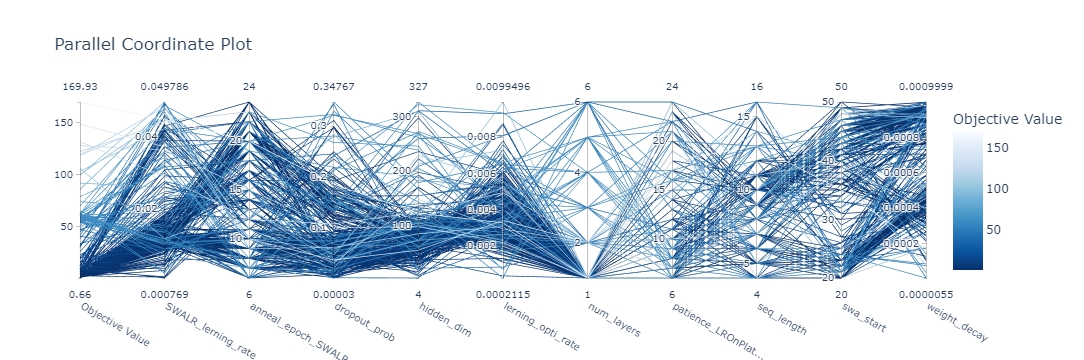

In [12]:
class TimeSeriesDataset(Dataset):
    def __init__(self, df, index, seq_length):
        self.data = torch.tensor(df.loc[index].values).float()
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję

############################################################################################################################
# Definicja modelu LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out)  
        out = self.fc(out)
        return out
###########################################################################################################################
class ImprovedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)  # Usunięto dropout
        self.dropout1 = nn.Dropout(dropout_prob)  # Dropout po LSTM
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.gelu = nn.GELU()
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.ln1 = nn.LayerNorm(hidden_dim * 2)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout1(out)
        out = torch.cat((out[:, :, :hidden_dim], out[:, :, hidden_dim:]), dim=-1)
        out = self.ln1(out)
        out = self.fc1(out)
        out = self.gelu(out)
        out = self.dropout2(out)
        out = self.fc2(out)
        return out
############################################################################################################################
class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob, kernel_size=3):
        super().__init__()
        self.conv1d = nn.Conv1d(in_channels=input_dim, out_channels=hidden_dim, kernel_size=kernel_size, padding=1)
        self.gelu = nn.GELU()
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.lstm = nn.LSTM(input_size=hidden_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True,
                            dropout=dropout_prob if num_layers > 1 else 0)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(in_features=hidden_dim, out_features=output_dim)

    def forward(self, x):
        x = x.permute(0, 2, 1) 
        out = self.conv1d(x)
        out = self.gelu(out)
        out = self.batch_norm(out)
        out = out.permute(0, 2, 1) 
        out, _ = self.lstm(out)
        out = self.dropout(out)
        out = self.fc(out)
        return out
############################################################################################################################
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, theta_size, basis_function, backcast_length, forecast_length, layer_norm=True):
        super().__init__()
        self.basis_function = basis_function
        self.fc1 = nn.Linear(backcast_length, theta_size)
        self.fc2 = nn.Linear(theta_size, forecast_length)
        self.layer_norm = nn.LayerNorm(theta_size) if layer_norm else nn.Identity()

    def forward(self, x):
        backcast, forecast = x[:, :-self.forecast_length], x[:, -self.forecast_length:]
        theta_b = self.layer_norm(self.fc1(backcast))
        theta_f = self.layer_norm(self.fc1(forecast))
        backcast = self.basis_function(theta_b)
        forecast = self.basis_function(theta_f)
        return backcast, forecast


class NBeats(nn.Module):
    def __init__(self, input_size, stack_types, nb_blocks_per_stack, forecast_length, backcast_length, thetas_dim, share_weights_in_stack, basis_function, layer_norm=True):
        super().__init__()
        self.forecast_length = forecast_length
        self.backcast_length = backcast_length
        self.stacks = nn.ModuleList([
            self.create_stack(input_size, stack_type, nb_blocks, forecast_length, backcast_length, thetas_dim[i], share_weights_in_stack[i], basis_function[i], layer_norm)
            for i, stack_type in enumerate(stack_types)
        ])

    def create_stack(self, input_size, stack_type, nb_blocks, forecast_length, backcast_length, theta_size, share_weights, basis_function, layer_norm):
        blocks = nn.ModuleList([
            NBeatsBlock(input_size, theta_size, basis_function, backcast_length, forecast_length, layer_norm)
            for _ in range(nb_blocks)
        ])
        if share_weights:
            for block in blocks[1:]:
                block.fc1 = blocks[0].fc1
                block.fc2 = blocks[0].fc2
        return blocks

    def forward(self, x):
        B, T = x.shape
        forecast = torch.zeros(size=(B, self.forecast_length), device=x.device)  # Użycie tego samego urządzenia co x
        for stack in self.stacks:
            for block in stack:
                backcast, block_forecast = block(x)
                x = x - backcast
                forecast = forecast + block_forecast
        return forecast

############################
# {'hidden_dim': 90, 'num_layers': 2, 'lerning_opti_rate': 0.0015888833913697271, 'dropout_prob': 0.27289339522494993, 
# 'weight_decay': 0.0009982192549062888, 'seq_length': 6, 'swa_start': 28, 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 24, 
# 'SWALR_lerning_rate': 0.0003279491142890727}{'hidden_dim': 90, 'num_layers': 2, 'lerning_opti_rate': 0.0015888833913697271,
# 'dropout_prob': 0.27289339522494993, 'weight_decay': 0.0009982192549062888, 'seq_length': 6, 'swa_start': 28,
# 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 24, 'SWALR_lerning_rate': 0.0003279491142890727}
###########################

def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=32):
    train_dataset = TimeSeriesDataset(df, train_index, seq_length)
    val_dataset = TimeSeriesDataset(df, val_index, seq_length)
    test_dataset = TimeSeriesDataset(df, test_index, seq_length)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader


def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0

    for batch in data_loader:
        optimizer.zero_grad()
        outputs = model(batch)

        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    return train_loss / len(data_loader)

def evaluate(model, data_loader, criterion):
    model.eval()
    eval_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            outputs = model(batch)
            
            loss = criterion(outputs, batch)
            eval_loss += loss.item()

    return eval_loss / len(data_loader)

# Parametry modelu
#seq_length = 10  # Długość sekwencji wejściowej
input_dim = 1
output_dim = 1  # Przewidywana wartość
num_epochs = 160

def objective(trial: Trial, df, n_splits, fold_size):
    # Hiperparametry do optymalizacji
    hidden_dim   = trial.suggest_int("hidden_dim", 4, 328)
    num_layers   = trial.suggest_int("num_layers", 1, 6)
    lr            = trial.suggest_float("lerning_opti_rate", 1e-6, 1e-2)
    dropout_prob  = trial.suggest_float("dropout_prob", 0.0, 0.35)
    weight_decay  = trial.suggest_float("weight_decay", 1e-7, 1e-3)
    seq_length    = trial.suggest_int("seq_length", 4, 16)
    swa_start     = trial.suggest_int("swa_start", 20, 50)  
    patience      = trial.suggest_int('patience_LROnPlateau', 6, 24 )
    anneal_epochs = trial.suggest_int('anneal_epoch_SWALR', 6 , 24 )
    swa_lr        = trial.suggest_float("SWALR_lerning_rate", 1e-6, 5e-2)

    total_val_loss = 0.0
    total_test_loss = 0.0
    
    # Iteration through folds
    for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
        # Print indexes in one line
        val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Start the day after training
        val_end_date = test_index[0] - pd.DateOffset(days=1)  # End the day before testing
        val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

        # Ensure consistent data loaders for each trial and avoid shuffling for validation and test
        train_loader, val_loader, test_loader = create_data_loaders(df, train_index, val_index, test_index, seq_length=seq_length)

        # Reset Model State
        model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
        #model = ImprovedLSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
        #model = CNN_LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
        #model = NBeats(input_size, stack_types, nb_blocks_per_stack, forecast_length, backcast_length, thetas_dim, share_weights_in_stack, basis_function)
        swa_model = swa_utils.AveragedModel(model)

        # Reset Optimizer State - NEW
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "min", patience=patience)
        swa_scheduler = swa_utils.SWALR(optimizer, anneal_strategy="linear", anneal_epochs=anneal_epochs, swa_lr=swa_lr)

        best_val_loss = float('inf')  # For early stopping

        # Training 
        for epoch in range(num_epochs):
            train_loss = train_epoch(model, train_loader, criterion, optimizer)
            val_loss = evaluate(model, val_loader, criterion)
            
            # Update lr, but only for one scheduler         
            if epoch > swa_start:
                swa_model.update_parameters(model)
                swa_scheduler.step()
            else:
                scheduler.step(val_loss)
            
            trial.report(val_loss, epoch)  # Report validation loss at each epoch
            
            # if trial.should_prune():
            #     raise optuna.TrialPruned()
            
            # Wczesne zatrzymanie
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= 48:  
                    print(f"Early stopping at epoch {epoch+1}")
                    break
        
        # Update Batch Normalization and SWA after each fold
        swa_model.update_parameters(model)
        swa_utils.update_bn(train_loader, swa_model)  
        
        # Evaluation (on the test set)
        val_loss = evaluate(swa_model, val_loader, criterion)
        test_loss = evaluate(swa_model, test_loader, criterion)

        #print(f"Trial {trial.number}, Fold {fold}, Final Val Loss: {val_loss:.4f}, Walidacja: od {val_start_date.date()} do {val_end_date.date()}")
        #print(f"Trial {trial.number}, Fold {fold}, Final Test Loss: {test_loss:.4f}, Test: od {test_index[0].date()} do {test_index[-1].date()} ")


        # Report validation and test loss after each fold
        trial.set_user_attr(f"val_loss_fold_{fold}", val_loss)
        trial.set_user_attr(f"test_loss_fold_{fold}", test_loss)

        trial.report(val_loss, fold)  # Include both losses
        trial.report(test_loss, fold)
        
        total_val_loss += val_loss
        total_test_loss += test_loss

    return total_val_loss + total_test_loss

# Uruchomienie optymalizacji
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(n_startup_trials=42), pruner=optuna.pruners.HyperbandPruner(min_resource=3))
study.optimize(lambda trial: objective(trial, df, n_splits, fold_size), n_trials=320)

print("Najlepsze hiperparametry:", study.best_params)
#print("Najlepsze wartości metryk:", study.best_values)

fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()